In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import time

In [166]:
data_initial = pd.read_csv('51Trips_Data.csv')


In [167]:
data_initial.head()

TRIP_ID  Row_num AGENCY_CODE AGENCY_NAME    TRIP_NAME  \
0  sjR1vOfAjjJHMEvLJEge        1         NaN         NaN  Summer trip   
1  e4D2FIUGhYkbUKM23AVd        2         NaN         NaN  aniversario   
2  B5YJe52YuoGfwmQXTmN4        3         NaN         NaN      Monaco!   
3  xS6YQEUN7Elk9QDAerIV        4         NaN         NaN    Filipinas   
4  EMZduY0QQ0hwd1Rh9NDS        5         NaN         NaN  London Baby   

                        USER_ID USER_NAME                       EMAIL  \
0  CvOLbY472IMPhTPA6MjNpobBT5x2       Edu         edu260399@gmail.com   
1  00nAjg3NbjP7RU2VwCduOz8qjcw1       Ale    alepadillach@hotmail.com   
2  kdbWpAYarPgbMMEikKjjKpQYIas1      Alba  aguirredavidalba@gmail.com   
3  QHTPwRbr9cYe5rXdpvmOFAESa0D3   Claudia     bradigallardo@gmail.com   
4  kdbWpAYarPgbMMEikKjjKpQYIas1      Alba  aguirredavidalba@gmail.com   

  USER_CREATED_DATE IDIOMA_APP  ... DAYS_COMPLETED DAYS_TOTAL  \
0               NaN        NaN  ...              0         18   
1               NaN        NaN  ...              0          9   
2               NaN      es-ES  ...              0          6   
3               NaN        NaN  ...              0         14   
4               NaN      es-ES  ...              0          6   

  RATE_DAYS_COMPLETED TRIP_LEVEL     PORC_ON_TIME  \
0                 0.0          0  Trip not active   
1                 0.0          0  Trip not active   
2                 0.0          0  Trip not active   
3                 0.0          0  Trip not active   
4                 0.0          0  Trip not active   

   DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
0                             42                 NaN             0   
1                            162                 NaN             0   
2                             91                 NaN             4   
3                            229                 NaN             1   
4                            166                 NaN             0   

   TOTAL_ORDERS ORDER_DATES  
0             0         NaN  
1             0         NaN  
2             0         NaN  
3             0         NaN  
4             0         NaN  

[5 rows x 25 columns]

In [168]:
data_initial.shape

(17567, 25)

In [169]:
data = data_initial.drop(columns=["TRIP_ID", "AGENCY_NAME", "Row_num", "TRIP_NAME", "USER_ID", "USER_NAME", "EMAIL"])

In [170]:
data.shape

(17567, 18)

In [171]:
data.head()

AGENCY_CODE USER_CREATED_DATE IDIOMA_APP          COUNTRIES_TRIP  \
0         NaN               NaN        NaN                   Chile   
1         NaN               NaN        NaN  México, Estados Unidos   
2         NaN               NaN      es-ES                  Mónaco   
3         NaN               NaN        NaN               Filipinas   
4         NaN               NaN      es-ES             Reino Unido   

  TRIP_STATUS TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  \
0    Returned        17-06-2022  30-07-2022  16-08-2022               0   
1    Returned        17-06-2022  27-11-2022  05-12-2022               0   
2    Returned        17-06-2022  17-09-2022  22-09-2022               0   
3    Returned        17-06-2022  02-02-2023  15-02-2023               0   
4    Returned        17-06-2022  01-12-2022  06-12-2022               0   

   DAYS_TOTAL  RATE_DAYS_COMPLETED  TRIP_LEVEL     PORC_ON_TIME  \
0          18                  0.0           0  Trip not active   
1           9                  0.0           0  Trip not active   
2           6                  0.0           0  Trip not active   
3          14                  0.0           0  Trip not active   
4           6                  0.0           0  Trip not active   

   DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
0                             42                 NaN             0   
1                            162                 NaN             0   
2                             91                 NaN             4   
3                            229                 NaN             1   
4                            166                 NaN             0   

   TOTAL_ORDERS ORDER_DATES  
0             0         NaN  
1             0         NaN  
2             0         NaN  
3             0         NaN  
4             0         NaN

In [172]:
data = data[data["TRIP_STATUS"] != "Future"]

In [173]:
data = data[data["TRIP_STATUS"] != "Active trip"]

In [174]:
data.shape

(17410, 18)

**TRACTEM LA VARIABLE AGENCY CODE**

In [175]:
data['AGENCY_CODE'] = data['AGENCY_CODE'].fillna(0)
data['ORDER_DATES'] = data['ORDER_DATES'].fillna(0)
data['AVG_PICS_DAY_COMPL'] = data['AVG_PICS_DAY_COMPL'].fillna(0)
data['IDIOMA_APP'] = data['IDIOMA_APP'].fillna(0)

In [176]:
data['AGENCY_CODE'] = (data['AGENCY_CODE'] != 0).astype(int)


**TRACTEM LA VARIALBE USER_CREATED_DATE**

In [177]:
new_dataset = data[data['USER_CREATED_DATE'].notna()].copy()
new_dataset.head()

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP  \
2500            0  11-07-2022 18:39:05          0   
2502            0  11-07-2022 18:58:46          0   
2506            0  11-07-2022 19:31:50          0   
2507            0  11-07-2022 19:40:14      es-ES   
2509            0  11-07-2022 20:07:56      ca-ES   

                                         COUNTRIES_TRIP TRIP_STATUS  \
2500                                             Israel    Returned   
2502                                             México    Returned   
2506  Alemania, Austria, Croacia, Eslovenia, Hungría...    Returned   
2507                                             España    Returned   
2509                                         Azerbaiyán    Returned   

     TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  DAYS_TOTAL  \
2500        11-07-2022  12-03-2018  18-03-2018               0           7   
2502        11-07-2022  04-07-2022  11-07-2022               0           8   
2506        11-07-2022  20-07-2022  03-08-2022               0          15   
2507        11-07-2022  15-07-2022  21-07-2022               0           7   
2509        11-07-2022  11-07-2022  28-07-2022               0          18   

      RATE_DAYS_COMPLETED  TRIP_LEVEL     PORC_ON_TIME  \
2500                  0.0           0  Trip not active   
2502                  0.0           0  Trip not active   
2506                  0.0           0  Trip not active   
2507                  0.0           0  Trip not active   
2509                  0.0           0  Trip not active   

      DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
2500                          -1582                 0.0             0   
2502                             -7                 0.0             1   
2506                              8                 0.0             0   
2507                              3                 0.0             1   
2509                              0                 0.0             0   

      TOTAL_ORDERS ORDER_DATES  
2500             0           0  
2502             0           0  
2506             0           0  
2507             0           0  
2509             0           0

In [178]:
new_dataset['USER_CREATED_DATE'] = pd.to_datetime(new_dataset['USER_CREATED_DATE'], format="%d-%m-%Y %H:%M:%S")
new_dataset['USER_CREATED_DATE'] = new_dataset['USER_CREATED_DATE'].dt.strftime("%d-%m-%Y")

new_dataset.head()

AGENCY_CODE USER_CREATED_DATE IDIOMA_APP  \
2500            0        11-07-2022          0   
2502            0        11-07-2022          0   
2506            0        11-07-2022          0   
2507            0        11-07-2022      es-ES   
2509            0        11-07-2022      ca-ES   

                                         COUNTRIES_TRIP TRIP_STATUS  \
2500                                             Israel    Returned   
2502                                             México    Returned   
2506  Alemania, Austria, Croacia, Eslovenia, Hungría...    Returned   
2507                                             España    Returned   
2509                                         Azerbaiyán    Returned   

     TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  DAYS_TOTAL  \
2500        11-07-2022  12-03-2018  18-03-2018               0           7   
2502        11-07-2022  04-07-2022  11-07-2022               0           8   
2506        11-07-2022  20-07-2022  03-08-2022               0          15   
2507        11-07-2022  15-07-2022  21-07-2022               0           7   
2509        11-07-2022  11-07-2022  28-07-2022               0          18   

      RATE_DAYS_COMPLETED  TRIP_LEVEL     PORC_ON_TIME  \
2500                  0.0           0  Trip not active   
2502                  0.0           0  Trip not active   
2506                  0.0           0  Trip not active   
2507                  0.0           0  Trip not active   
2509                  0.0           0  Trip not active   

      DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
2500                          -1582                 0.0             0   
2502                             -7                 0.0             1   
2506                              8                 0.0             0   
2507                              3                 0.0             1   
2509                              0                 0.0             0   

      TOTAL_ORDERS ORDER_DATES  
2500             0           0  
2502             0           0  
2506             0           0  
2507             0           0  
2509             0           0

In [179]:
new_dataset['USER_CREATED_DATE'] = pd.to_datetime(new_dataset['USER_CREATED_DATE'], format="%d-%m-%Y")
new_dataset['TRIP_CREATED_DATE'] = pd.to_datetime(new_dataset['TRIP_CREATED_DATE'], format="%d-%m-%Y")
new_dataset['START_DATE'] = pd.to_datetime(new_dataset['START_DATE'], format="%d-%m-%Y")

# Calculate differences in days
new_dataset['USER_CREATED_TRIP_CREATED'] = (new_dataset['TRIP_CREATED_DATE'] - new_dataset['USER_CREATED_DATE']).dt.days
new_dataset['USER_CREATED_TRIP_STARTED'] = (new_dataset['START_DATE'] - new_dataset['USER_CREATED_DATE']).dt.days

new_dataset.head()

AGENCY_CODE USER_CREATED_DATE IDIOMA_APP  \
2500            0        2022-07-11          0   
2502            0        2022-07-11          0   
2506            0        2022-07-11          0   
2507            0        2022-07-11      es-ES   
2509            0        2022-07-11      ca-ES   

                                         COUNTRIES_TRIP TRIP_STATUS  \
2500                                             Israel    Returned   
2502                                             México    Returned   
2506  Alemania, Austria, Croacia, Eslovenia, Hungría...    Returned   
2507                                             España    Returned   
2509                                         Azerbaiyán    Returned   

     TRIP_CREATED_DATE START_DATE    END_DATE  DAYS_COMPLETED  DAYS_TOTAL  \
2500        2022-07-11 2018-03-12  18-03-2018               0           7   
2502        2022-07-11 2022-07-04  11-07-2022               0           8   
2506        2022-07-11 2022-07-20  03-08-2022               0          15   
2507        2022-07-11 2022-07-15  21-07-2022               0           7   
2509        2022-07-11 2022-07-11  28-07-2022               0          18   

      RATE_DAYS_COMPLETED  TRIP_LEVEL     PORC_ON_TIME  \
2500                  0.0           0  Trip not active   
2502                  0.0           0  Trip not active   
2506                  0.0           0  Trip not active   
2507                  0.0           0  Trip not active   
2509                  0.0           0  Trip not active   

      DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
2500                          -1582                 0.0             0   
2502                             -7                 0.0             1   
2506                              8                 0.0             0   
2507                              3                 0.0             1   
2509                              0                 0.0             0   

      TOTAL_ORDERS ORDER_DATES  USER_CREATED_TRIP_CREATED  \
2500             0           0                          0   
2502             0           0                          0   
2506             0           0                          0   
2507             0           0                          0   
2509             0           0                          0   

      USER_CREATED_TRIP_STARTED  
2500                      -1582  
2502                         -7  
2506                          9  
2507                          4  
2509                          0

Falta incloure les dades de new_Dataset a el dataset data. Pero estic intentant reduir el nobre de nulls en aqestes observacions (parlant amb l'empresa) perquè ara mateix hi ha 4000 observaciones sense dades a user_created_date.

**TRACTEM LA VARIALBE ORDER DATES**

In [180]:
data[data['ORDER_DATES'] != 0]

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP      COUNTRIES_TRIP  \
53               0                  NaN      it-IT            Jordania   
57               0                  NaN      es-ES            Maldivas   
112              0                  NaN      es-ES            Islandia   
136              0                  NaN      es-ES  Italia, San Marino   
137              0                  NaN      es-ES             Francia   
...            ...                  ...        ...                 ...   
17417            0                  NaN      ca-ES   Alemania, Noruega   
17419            1   02-09-2023 0:53:55      ca-ES           Tailandia   
17425            0  18-12-2023 23:35:44      it-IT             Camboya   
17463            0                  NaN      es-ES           Marruecos   
17505            0  05-12-2023 18:21:34      es-ES             Bélgica   

      TRIP_STATUS TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  \
53       Returned        17-06-2022  26-06-2022  02-07-2022               7   
57       Returned        17-06-2022  23-06-2022  05-07-2022              13   
112      Returned        19-06-2022  02-07-2022  10-07-2022               9   
136      Returned        19-06-2022  13-08-2022  21-08-2022               9   
137      Returned        19-06-2022  03-12-2022  08-12-2022               6   
...           ...               ...         ...         ...             ...   
17417    Returned        17-12-2023  06-12-2023  11-12-2023               6   
17419    Returned        18-12-2023  03-12-2023  15-12-2023              13   
17425    Returned        18-12-2023  22-12-2023  05-01-2024              15   
17463    Returned        25-12-2023  05-12-2023  11-12-2023               7   
17505    Returned        29-12-2023  29-12-2023  02-01-2024               5   

       DAYS_TOTAL  RATE_DAYS_COMPLETED  TRIP_LEVEL     PORC_ON_TIME  \
53              7                100.0           7  Trip not active   
57             13                100.0           7  Trip not active   
112             9                100.0           7  Trip not active   
136             9                100.0           7  Trip not active   
137             6                100.0           7  Trip not active   
...           ...                  ...         ...              ...   
17417           6                100.0           7  Trip not active   
17419          13                100.0           7  Trip not active   
17425          15                100.0           7  Trip not active   
17463           7                100.0           7  Trip not active   
17505           5                100.0           7  Trip not active   

       DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
53                                 8                 5.0             0   
57                                 5                 5.0             1   
112                               12                10.0             0   
136                               54                 8.0             1   
137                              166                 9.0             5   
...                              ...                 ...           ...   
17417                            -11                10.0             3   
17419                            -15                 5.0             1   
17425                              3                 9.0             6   
17463                            -20                 9.0             1   
17505                              0                10.0             4   

       TOTAL_ORDERS ORDER_DATES  
53                1    14/07/22  
57                1    24/11/23  
112               1    18/07/22  
136               1    25/09/22  
137               1    01/03/23  
...             ...         ...  
17417             1    19/12/23  
17419             1    19/12/23  
17425             1    06/01/24  
17463             1    25/12/23  
17505             1    03/01/24  

[1076 rows x 18 co

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17410 entries, 0 to 17565
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGENCY_CODE                    17410 non-null  int32  
 1   USER_CREATED_DATE              13246 non-null  object 
 2   IDIOMA_APP                     17410 non-null  object 
 3   COUNTRIES_TRIP                 17055 non-null  object 
 4   TRIP_STATUS                    17101 non-null  object 
 5   TRIP_CREATED_DATE              17410 non-null  object 
 6   START_DATE                     17410 non-null  object 
 7   END_DATE                       17102 non-null  object 
 8   DAYS_COMPLETED                 17410 non-null  int64  
 9   DAYS_TOTAL                     17410 non-null  int64  
 10  RATE_DAYS_COMPLETED            17410 non-null  float64
 11  TRIP_LEVEL                     17410 non-null  int64  
 12  PORC_ON_TIME                   17410 non-null  obje

In [182]:
data[['ORDER_DATE_1', 'ORDER_DATE_2', 'ORDER_DATE_3','ORDER_DATE_4']] = data['ORDER_DATES'].astype(str).str.split(',', expand=True)
data.head()

AGENCY_CODE USER_CREATED_DATE IDIOMA_APP          COUNTRIES_TRIP  \
0            0               NaN          0                   Chile   
1            0               NaN          0  México, Estados Unidos   
2            0               NaN      es-ES                  Mónaco   
3            0               NaN          0               Filipinas   
4            0               NaN      es-ES             Reino Unido   

  TRIP_STATUS TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  \
0    Returned        17-06-2022  30-07-2022  16-08-2022               0   
1    Returned        17-06-2022  27-11-2022  05-12-2022               0   
2    Returned        17-06-2022  17-09-2022  22-09-2022               0   
3    Returned        17-06-2022  02-02-2023  15-02-2023               0   
4    Returned        17-06-2022  01-12-2022  06-12-2022               0   

   DAYS_TOTAL  ...     PORC_ON_TIME  DAYS_CREATED_AFTER_START_DATE  \
0          18  ...  Trip not active                             42   
1           9  ...  Trip not active                            162   
2           6  ...  Trip not active                             91   
3          14  ...  Trip not active                            229   
4           6  ...  Trip not active                            166   

  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  ORDER_DATES  ORDER_DATE_1  \
0                0.0             0             0            0             0   
1                0.0             0             0            0             0   
2                0.0             4             0            0             0   
3                0.0             1             0            0             0   
4                0.0             0             0            0             0   

  ORDER_DATE_2 ORDER_DATE_3 ORDER_DATE_4  
0         None         None         None  
1         None         None         None  
2         None         None         None  
3         None         None         None  
4         None         None         None  

[5 rows x 22 columns]

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17410 entries, 0 to 17565
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGENCY_CODE                    17410 non-null  int32  
 1   USER_CREATED_DATE              13246 non-null  object 
 2   IDIOMA_APP                     17410 non-null  object 
 3   COUNTRIES_TRIP                 17055 non-null  object 
 4   TRIP_STATUS                    17101 non-null  object 
 5   TRIP_CREATED_DATE              17410 non-null  object 
 6   START_DATE                     17410 non-null  object 
 7   END_DATE                       17102 non-null  object 
 8   DAYS_COMPLETED                 17410 non-null  int64  
 9   DAYS_TOTAL                     17410 non-null  int64  
 10  RATE_DAYS_COMPLETED            17410 non-null  float64
 11  TRIP_LEVEL                     17410 non-null  int64  
 12  PORC_ON_TIME                   17410 non-null  obje

In [184]:
data[data['ORDER_DATES'] != 0]

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP      COUNTRIES_TRIP  \
53               0                  NaN      it-IT            Jordania   
57               0                  NaN      es-ES            Maldivas   
112              0                  NaN      es-ES            Islandia   
136              0                  NaN      es-ES  Italia, San Marino   
137              0                  NaN      es-ES             Francia   
...            ...                  ...        ...                 ...   
17417            0                  NaN      ca-ES   Alemania, Noruega   
17419            1   02-09-2023 0:53:55      ca-ES           Tailandia   
17425            0  18-12-2023 23:35:44      it-IT             Camboya   
17463            0                  NaN      es-ES           Marruecos   
17505            0  05-12-2023 18:21:34      es-ES             Bélgica   

      TRIP_STATUS TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  \
53       Returned        17-06-2022  26-06-2022  02-07-2022               7   
57       Returned        17-06-2022  23-06-2022  05-07-2022              13   
112      Returned        19-06-2022  02-07-2022  10-07-2022               9   
136      Returned        19-06-2022  13-08-2022  21-08-2022               9   
137      Returned        19-06-2022  03-12-2022  08-12-2022               6   
...           ...               ...         ...         ...             ...   
17417    Returned        17-12-2023  06-12-2023  11-12-2023               6   
17419    Returned        18-12-2023  03-12-2023  15-12-2023              13   
17425    Returned        18-12-2023  22-12-2023  05-01-2024              15   
17463    Returned        25-12-2023  05-12-2023  11-12-2023               7   
17505    Returned        29-12-2023  29-12-2023  02-01-2024               5   

       DAYS_TOTAL  ...     PORC_ON_TIME  DAYS_CREATED_AFTER_START_DATE  \
53              7  ...  Trip not active                              8   
57             13  ...  Trip not active                              5   
112             9  ...  Trip not active                             12   
136             9  ...  Trip not active                             54   
137             6  ...  Trip not active                            166   
...           ...  ...              ...                            ...   
17417           6  ...  Trip not active                            -11   
17419          13  ...  Trip not active                            -15   
17425          15  ...  Trip not active                              3   
17463           7  ...  Trip not active                            -20   
17505           5  ...  Trip not active                              0   

      AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  ORDER_DATES  \
53                   5.0             0             1     14/07/22   
57                   5.0             1             1     24/11/23   
112                 10.0             0             1     18/07/22   
136                  8.0             1             1     25/09/22   
137                  9.0             5             1     01/03/23   
...                  ...           ...           ...          ...   
17417               10.0             3             1     19/12/23   
17419                5.0             1             1     19/12/23   
17425                9.0             6             1     06/01/24   
17463                9.0             1             1     25/12/23   
17505               10.0             4             1     03/01/24   

       ORDER_DATE_1 ORDER_DATE_2 ORDER_DATE_3 ORDER_DATE_4  
53         14/07/22         None         None         None  
57         24/11/23         None         None         None  
112        18/07/22         None         None         None  
136        25/09/22         None         None         None  
137        01/03/23         None         None         None  
...             ...          ...          ...          ...  
17417      19/12/23     

In [185]:
data['ORDER_DATE_1'] = pd.to_datetime(data['ORDER_DATE_1'], errors='coerce', format="%d/%m/%y")
data['ORDER_DATE_1'] = pd.to_datetime(data['ORDER_DATE_1'], errors='coerce', format="%d-%m-%y")

In [186]:
data[data['ORDER_DATES'] != 0]

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP      COUNTRIES_TRIP  \
53               0                  NaN      it-IT            Jordania   
57               0                  NaN      es-ES            Maldivas   
112              0                  NaN      es-ES            Islandia   
136              0                  NaN      es-ES  Italia, San Marino   
137              0                  NaN      es-ES             Francia   
...            ...                  ...        ...                 ...   
17417            0                  NaN      ca-ES   Alemania, Noruega   
17419            1   02-09-2023 0:53:55      ca-ES           Tailandia   
17425            0  18-12-2023 23:35:44      it-IT             Camboya   
17463            0                  NaN      es-ES           Marruecos   
17505            0  05-12-2023 18:21:34      es-ES             Bélgica   

      TRIP_STATUS TRIP_CREATED_DATE  START_DATE    END_DATE  DAYS_COMPLETED  \
53       Returned        17-06-2022  26-06-2022  02-07-2022               7   
57       Returned        17-06-2022  23-06-2022  05-07-2022              13   
112      Returned        19-06-2022  02-07-2022  10-07-2022               9   
136      Returned        19-06-2022  13-08-2022  21-08-2022               9   
137      Returned        19-06-2022  03-12-2022  08-12-2022               6   
...           ...               ...         ...         ...             ...   
17417    Returned        17-12-2023  06-12-2023  11-12-2023               6   
17419    Returned        18-12-2023  03-12-2023  15-12-2023              13   
17425    Returned        18-12-2023  22-12-2023  05-01-2024              15   
17463    Returned        25-12-2023  05-12-2023  11-12-2023               7   
17505    Returned        29-12-2023  29-12-2023  02-01-2024               5   

       DAYS_TOTAL  ...     PORC_ON_TIME  DAYS_CREATED_AFTER_START_DATE  \
53              7  ...  Trip not active                              8   
57             13  ...  Trip not active                              5   
112             9  ...  Trip not active                             12   
136             9  ...  Trip not active                             54   
137             6  ...  Trip not active                            166   
...           ...  ...              ...                            ...   
17417           6  ...  Trip not active                            -11   
17419          13  ...  Trip not active                            -15   
17425          15  ...  Trip not active                              3   
17463           7  ...  Trip not active                            -20   
17505           5  ...  Trip not active                              0   

      AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  ORDER_DATES  \
53                   5.0             0             1     14/07/22   
57                   5.0             1             1     24/11/23   
112                 10.0             0             1     18/07/22   
136                  8.0             1             1     25/09/22   
137                  9.0             5             1     01/03/23   
...                  ...           ...           ...          ...   
17417               10.0             3             1     19/12/23   
17419                5.0             1             1     19/12/23   
17425                9.0             6             1     06/01/24   
17463                9.0             1             1     25/12/23   
17505               10.0             4             1     03/01/24   

       ORDER_DATE_1 ORDER_DATE_2 ORDER_DATE_3 ORDER_DATE_4  
53       2022-07-14         None         None         None  
57       2023-11-24         None         None         None  
112      2022-07-18         None         None         None  
136      2022-09-25         None         None         None  
137      2023-03-01         None         None         None  
...             ...          ...          ...          ...  
17417    2023-12-19     

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17410 entries, 0 to 17565
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AGENCY_CODE                    17410 non-null  int32         
 1   USER_CREATED_DATE              13246 non-null  object        
 2   IDIOMA_APP                     17410 non-null  object        
 3   COUNTRIES_TRIP                 17055 non-null  object        
 4   TRIP_STATUS                    17101 non-null  object        
 5   TRIP_CREATED_DATE              17410 non-null  object        
 6   START_DATE                     17410 non-null  object        
 7   END_DATE                       17102 non-null  object        
 8   DAYS_COMPLETED                 17410 non-null  int64         
 9   DAYS_TOTAL                     17410 non-null  int64         
 10  RATE_DAYS_COMPLETED            17410 non-null  float64       
 11  TRIP_LEVEL          

In [188]:
data['TRIP_CREATED_DATE'] = pd.to_datetime(data['TRIP_CREATED_DATE'], errors='coerce', format="%d-%m-%Y")
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', format="%d-%m-%Y")
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce', format="%d-%m-%Y")

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17410 entries, 0 to 17565
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AGENCY_CODE                    17410 non-null  int32         
 1   USER_CREATED_DATE              13246 non-null  object        
 2   IDIOMA_APP                     17410 non-null  object        
 3   COUNTRIES_TRIP                 17055 non-null  object        
 4   TRIP_STATUS                    17101 non-null  object        
 5   TRIP_CREATED_DATE              17410 non-null  datetime64[ns]
 6   START_DATE                     17410 non-null  datetime64[ns]
 7   END_DATE                       17102 non-null  datetime64[ns]
 8   DAYS_COMPLETED                 17410 non-null  int64         
 9   DAYS_TOTAL                     17410 non-null  int64         
 10  RATE_DAYS_COMPLETED            17410 non-null  float64       
 11  TRIP_LEVEL          

In [190]:
data[data['ORDER_DATES'] != 0]

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP      COUNTRIES_TRIP  \
53               0                  NaN      it-IT            Jordania   
57               0                  NaN      es-ES            Maldivas   
112              0                  NaN      es-ES            Islandia   
136              0                  NaN      es-ES  Italia, San Marino   
137              0                  NaN      es-ES             Francia   
...            ...                  ...        ...                 ...   
17417            0                  NaN      ca-ES   Alemania, Noruega   
17419            1   02-09-2023 0:53:55      ca-ES           Tailandia   
17425            0  18-12-2023 23:35:44      it-IT             Camboya   
17463            0                  NaN      es-ES           Marruecos   
17505            0  05-12-2023 18:21:34      es-ES             Bélgica   

      TRIP_STATUS TRIP_CREATED_DATE START_DATE   END_DATE  DAYS_COMPLETED  \
53       Returned        2022-06-17 2022-06-26 2022-07-02               7   
57       Returned        2022-06-17 2022-06-23 2022-07-05              13   
112      Returned        2022-06-19 2022-07-02 2022-07-10               9   
136      Returned        2022-06-19 2022-08-13 2022-08-21               9   
137      Returned        2022-06-19 2022-12-03 2022-12-08               6   
...           ...               ...        ...        ...             ...   
17417    Returned        2023-12-17 2023-12-06 2023-12-11               6   
17419    Returned        2023-12-18 2023-12-03 2023-12-15              13   
17425    Returned        2023-12-18 2023-12-22 2024-01-05              15   
17463    Returned        2023-12-25 2023-12-05 2023-12-11               7   
17505    Returned        2023-12-29 2023-12-29 2024-01-02               5   

       DAYS_TOTAL  ...     PORC_ON_TIME  DAYS_CREATED_AFTER_START_DATE  \
53              7  ...  Trip not active                              8   
57             13  ...  Trip not active                              5   
112             9  ...  Trip not active                             12   
136             9  ...  Trip not active                             54   
137             6  ...  Trip not active                            166   
...           ...  ...              ...                            ...   
17417           6  ...  Trip not active                            -11   
17419          13  ...  Trip not active                            -15   
17425          15  ...  Trip not active                              3   
17463           7  ...  Trip not active                            -20   
17505           5  ...  Trip not active                              0   

      AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  ORDER_DATES  \
53                   5.0             0             1     14/07/22   
57                   5.0             1             1     24/11/23   
112                 10.0             0             1     18/07/22   
136                  8.0             1             1     25/09/22   
137                  9.0             5             1     01/03/23   
...                  ...           ...           ...          ...   
17417               10.0             3             1     19/12/23   
17419                5.0             1             1     19/12/23   
17425                9.0             6             1     06/01/24   
17463                9.0             1             1     25/12/23   
17505               10.0             4             1     03/01/24   

       ORDER_DATE_1 ORDER_DATE_2 ORDER_DATE_3 ORDER_DATE_4  
53       2022-07-14         None         None         None  
57       2023-11-24         None         None         None  
112      2022-07-18         None         None         None  
136      2022-09-25         None         None         None  
137      2023-03-01         None         None         None  
...             ...          ...          ...          ...  
17417    2023-12-19         None         None   

In [191]:
# Creem noves variables
data['CREATED_ORDER'] = np.where(data['ORDER_DATE_1'].isnull() | (data['ORDER_DATE_1'] == 0), 0, (data['ORDER_DATE_1'] - data['TRIP_CREATED_DATE']).dt.days)
data['STARTED_ORDER'] = np.where(data['ORDER_DATE_1'].isnull() | (data['ORDER_DATE_1'] == 0), 0, (data['ORDER_DATE_1'] - data['START_DATE']).dt.days)
data['ENDED_ORDER'] = np.where(data['ORDER_DATE_1'].isnull() | (data['ORDER_DATE_1'] == 0), 0, (data['ORDER_DATE_1'] - data['END_DATE']).dt.days)


In [192]:
data = data.drop(columns = ['ORDER_DATES','ORDER_DATE_2','ORDER_DATE_3','ORDER_DATE_4'])

In [193]:
data[data['ORDER_DATE_1'].notnull()]

AGENCY_CODE    USER_CREATED_DATE IDIOMA_APP      COUNTRIES_TRIP  \
53               0                  NaN      it-IT            Jordania   
57               0                  NaN      es-ES            Maldivas   
112              0                  NaN      es-ES            Islandia   
136              0                  NaN      es-ES  Italia, San Marino   
137              0                  NaN      es-ES             Francia   
...            ...                  ...        ...                 ...   
17417            0                  NaN      ca-ES   Alemania, Noruega   
17419            1   02-09-2023 0:53:55      ca-ES           Tailandia   
17425            0  18-12-2023 23:35:44      it-IT             Camboya   
17463            0                  NaN      es-ES           Marruecos   
17505            0  05-12-2023 18:21:34      es-ES             Bélgica   

      TRIP_STATUS TRIP_CREATED_DATE START_DATE   END_DATE  DAYS_COMPLETED  \
53       Returned        2022-06-17 2022-06-26 2022-07-02               7   
57       Returned        2022-06-17 2022-06-23 2022-07-05              13   
112      Returned        2022-06-19 2022-07-02 2022-07-10               9   
136      Returned        2022-06-19 2022-08-13 2022-08-21               9   
137      Returned        2022-06-19 2022-12-03 2022-12-08               6   
...           ...               ...        ...        ...             ...   
17417    Returned        2023-12-17 2023-12-06 2023-12-11               6   
17419    Returned        2023-12-18 2023-12-03 2023-12-15              13   
17425    Returned        2023-12-18 2023-12-22 2024-01-05              15   
17463    Returned        2023-12-25 2023-12-05 2023-12-11               7   
17505    Returned        2023-12-29 2023-12-29 2024-01-02               5   

       DAYS_TOTAL  ...  TRIP_LEVEL     PORC_ON_TIME  \
53              7  ...           7  Trip not active   
57             13  ...           7  Trip not active   
112             9  ...           7  Trip not active   
136             9  ...           7  Trip not active   
137             6  ...           7  Trip not active   
...           ...  ...         ...              ...   
17417           6  ...           7  Trip not active   
17419          13  ...           7  Trip not active   
17425          15  ...           7  Trip not active   
17463           7  ...           7  Trip not active   
17505           5  ...           7  Trip not active   

      DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
53                                8                 5.0             0   
57                                5                 5.0             1   
112                              12                10.0             0   
136                              54                 8.0             1   
137                             166                 9.0             5   
...                             ...                 ...           ...   
17417                           -11                10.0             3   
17419                           -15                 5.0             1   
17425                             3                 9.0             6   
17463                           -20                 9.0             1   
17505                             0                10.0             4   

       TOTAL_ORDERS  ORDER_DATE_1 CREATED_ORDER  STARTED_ORDER  ENDED_ORDER  
53                1    2022-07-14          27.0           18.0         12.0  
57                1    2023-11-24         525.0          519.0        507.0  
112               1    2022-07-18          29.0           16.0          8.0  
136               1    2022-09-25          98.0           43.0         35.0  
137               1    2023-03-01         255.0           88.0         83.0  
...             ...           ...           ...            ...          ...  
17417             1    2023-12-19           2.0           13.0          8.0  
17419             1    2023-12-

In [194]:
# data['ORDER_DATE_1'] = data[data['ORDER_DATE_1']].fillna(0)
data.head()

AGENCY_CODE USER_CREATED_DATE IDIOMA_APP          COUNTRIES_TRIP  \
0            0               NaN          0                   Chile   
1            0               NaN          0  México, Estados Unidos   
2            0               NaN      es-ES                  Mónaco   
3            0               NaN          0               Filipinas   
4            0               NaN      es-ES             Reino Unido   

  TRIP_STATUS TRIP_CREATED_DATE START_DATE   END_DATE  DAYS_COMPLETED  \
0    Returned        2022-06-17 2022-07-30 2022-08-16               0   
1    Returned        2022-06-17 2022-11-27 2022-12-05               0   
2    Returned        2022-06-17 2022-09-17 2022-09-22               0   
3    Returned        2022-06-17 2023-02-02 2023-02-15               0   
4    Returned        2022-06-17 2022-12-01 2022-12-06               0   

   DAYS_TOTAL  ...  TRIP_LEVEL     PORC_ON_TIME DAYS_CREATED_AFTER_START_DATE  \
0          18  ...           0  Trip not active                            42   
1           9  ...           0  Trip not active                           162   
2           6  ...           0  Trip not active                            91   
3          14  ...           0  Trip not active                           229   
4           6  ...           0  Trip not active                           166   

   AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  ORDER_DATE_1 CREATED_ORDER  \
0                 0.0             0             0           NaT           0.0   
1                 0.0             0             0           NaT           0.0   
2                 0.0             4             0           NaT           0.0   
3                 0.0             1             0           NaT           0.0   
4                 0.0             0             0           NaT           0.0   

   STARTED_ORDER  ENDED_ORDER  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  

[5 rows x 21 columns]

In [195]:
data.describe()

AGENCY_CODE              TRIP_CREATED_DATE  \
count  17410.000000                          17410   
mean       0.012234  2022-10-25 23:41:48.213670400   
min        0.000000            2022-06-17 00:00:00   
25%        0.000000            2022-07-23 00:00:00   
50%        0.000000            2022-08-16 00:00:00   
75%        0.000000            2022-12-09 00:00:00   
max        1.000000            2024-01-06 00:00:00   
std        0.109933                            NaN   

                          START_DATE                       END_DATE  \
count                          17410                          17102   
mean   2022-09-14 05:42:00.620333056  2022-09-26 09:53:16.678750976   
min              1980-09-01 00:00:00            1980-09-23 00:00:00   
25%              2022-07-21 00:00:00            2022-07-31 00:00:00   
50%              2022-08-14 00:00:00            2022-08-26 00:00:00   
75%              2022-11-29 00:00:00            2022-12-11 00:00:00   
max              2024-01-09 00:00:00            2024-01-11 00:00:00   
std                              NaN                            NaN   

       DAYS_COMPLETED    DAYS_TOTAL  RATE_DAYS_COMPLETED    TRIP_LEVEL  \
count    17410.000000  17410.000000         17410.000000  17410.000000   
mean         1.896152     11.525847            18.296094      1.334233   
min          0.000000      2.000000             0.000000      0.000000   
25%          0.000000      7.000000             0.000000      0.000000   
50%          0.000000      9.000000             0.000000      0.000000   
75%          2.000000     14.000000            17.000000      2.000000   
max         48.000000    122.000000           100.000000      7.000000   
std          3.962634      7.604469            32.693532      2.160089   

       DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
count                   17410.000000        17410.000000  17410.000000   
mean                      -42.182366            3.093739      1.099943   
min                    -15263.000000            0.000000      0.000000   
25%                       -14.000000            0.000000      0.000000   
50%                         0.000000            0.000000      1.000000   
75%                        10.000000            6.000000      2.000000   
max                       548.000000           91.000000     13.000000   
std                       293.350858            4.800094      1.499767   

       TOTAL_ORDERS                   ORDER_DATE_1  CREATED_ORDER  \
count  17410.000000                           1076   17410.000000   
mean       0.066973  2023-03-21 12:58:53.085501952       3.622516   
min        0.000000            2022-07-14 00:00:00       0.000000   
25%        0.000000            2022-09-29 00:00:00       0.000000   
50%        0.000000            2023-03-05 12:00:00       0.000000   
75%        0.000000            2023-09-07 00:00:00       0.000000   
max        4.000000            2024-01-06 00:00:00     525.000000   
std        0.273466                            NaN      23.367079   

       STARTED_ORDER   ENDED_ORDER  
count   17410.000000  17410.000000  
mean        6.265997      5.645434  
min         0.000000    -19.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max      3638.000000   3635.000000  
std        70.131310     69.317572

In [196]:
data = data.drop(columns=["TRIP_STATUS", "TRIP_CREATED_DATE", "START_DATE", "END_DATE", 
                          "RATE_DAYS_COMPLETED", "PORC_ON_TIME","USER_CREATED_DATE"])



**Hi ha un problema amb els nulls de les columnes noves, si els convertim a 0 ens foten totes les dades**

**TRACTEM LA VARIALBE IDIOMA**

In [197]:
data.head()

AGENCY_CODE IDIOMA_APP          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0          0                   Chile               0          18   
1            0          0  México, Estados Unidos               0           9   
2            0      es-ES                  Mónaco               0           6   
3            0          0               Filipinas               0          14   
4            0      es-ES             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  CREATED_ORDER  STARTED_ORDER  \
0             0             0          NaT            0.0            0.0   
1             0             0          NaT            0.0            0.0   
2             4             0          NaT            0.0            0.0   
3             1             0          NaT            0.0            0.0   
4             0             0          NaT            0.0            0.0   

   ENDED_ORDER  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [198]:
null_values = data[data['IDIOMA_APP'] == 0]
null_values


AGENCY_CODE IDIOMA_APP          COUNTRIES_TRIP  DAYS_COMPLETED  \
0                0          0                   Chile               0   
1                0          0  México, Estados Unidos               0   
3                0          0               Filipinas               0   
6                0          0                  Egipto               0   
7                0          0                  España               0   
...            ...        ...                     ...             ...   
15177            0          0             Reino Unido               0   
15777            0          0                  Panamá               0   
17014            0          0                  España               0   
17091            0          0                  México               0   
17280            0          0             Reino Unido               0   

       DAYS_TOTAL  TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  \
0              18           0                             42   
1               9           0                            162   
3              14           0                            229   
6              17           0                            371   
7               8           0                            -37   
...           ...         ...                            ...   
15177           6           0                            -77   
15777           8           0                              0   
17014          10           0                             44   
17091          10           0                            -33   
17280           6           0                              0   

       AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  \
0                     0.0             0             0          NaT   
1                     0.0             0             0          NaT   
3                     0.0             1             0          NaT   
6                     0.0             1             0          NaT   
7                     0.0             0             0          NaT   
...                   ...           ...           ...          ...   
15177                 0.0             0             0          NaT   
15777                 0.0             0             0          NaT   
17014                 0.0             0             0          NaT   
17091                 0.0             0             0          NaT   
17280                 0.0             0             0          NaT   

       CREATED_ORDER  STARTED_ORDER  ENDED_ORDER  
0                0.0            0.0          0.0  
1                0.0            0.0          0.0  
3                0.0            0.0          0.0  
6                0.0            0.0          0.0  
7                0.0            0.0          0.0  
...              ...            ...          ...  
15177            0.0            0.0          0.0  
15777            0.0            0.0          0.0  
17014            0.0            0.0          0.0  
17091            0.0            0.0          0.0  
17280            0.0            0.0          0.0  

[1751 rows x 14 columns]

In [199]:
#Divisó columna idioma entre idioma del teléfon, país de la creació del álbum i una columna extra pels casos que tenen dos guions
data['IDIOMA_APP'] = data['IDIOMA_APP'].replace(0, '0-0')
data[['LANGUAGE_PHONE', 'COUNTRY_BASED','RANDOM']] = data['IDIOMA_APP'].str.split('-', expand=True)
data.head()

AGENCY_CODE IDIOMA_APP          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0        0-0                   Chile               0          18   
1            0        0-0  México, Estados Unidos               0           9   
2            0      es-ES                  Mónaco               0           6   
3            0        0-0               Filipinas               0          14   
4            0      es-ES             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  CREATED_ORDER  STARTED_ORDER  \
0             0             0          NaT            0.0            0.0   
1             0             0          NaT            0.0            0.0   
2             4             0          NaT            0.0            0.0   
3             1             0          NaT            0.0            0.0   
4             0             0          NaT            0.0            0.0   

   ENDED_ORDER LANGUAGE_PHONE COUNTRY_BASED RANDOM  
0          0.0              0             0   None  
1          0.0              0             0   None  
2          0.0             es            ES   None  
3          0.0              0             0   None  
4          0.0             es            ES   None

In [200]:
data = data.drop(columns = ['IDIOMA_APP'])

In [201]:
data[data['RANDOM'].notna()]

AGENCY_CODE                             COUNTRIES_TRIP  DAYS_COMPLETED  \
15964            1  Austria, Francia, España, Suiza, Alemania              15   

       DAYS_TOTAL  TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  \
15964          15           7                              0   

       AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  \
15964                11.0             0             1   2023-08-27   

       CREATED_ORDER  STARTED_ORDER  ENDED_ORDER LANGUAGE_PHONE COUNTRY_BASED  \
15964           18.0           18.0          4.0             zh          Hans   

      RANDOM  
15964     ES

In [202]:
data.loc[data['LANGUAGE_PHONE'] == 'zh', 'LANGUAGE_PHONE'] = 0 
data.loc[data['COUNTRY_BASED'] == 'Hans', 'COUNTRY_BASED'] = 'ES'

In [203]:
# Comprovació
data[data['RANDOM'].notna()]

AGENCY_CODE                             COUNTRIES_TRIP  DAYS_COMPLETED  \
15964            1  Austria, Francia, España, Suiza, Alemania              15   

       DAYS_TOTAL  TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  \
15964          15           7                              0   

       AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  \
15964                11.0             0             1   2023-08-27   

       CREATED_ORDER  STARTED_ORDER  ENDED_ORDER LANGUAGE_PHONE COUNTRY_BASED  \
15964           18.0           18.0          4.0              0            ES   

      RANDOM  
15964     ES

In [204]:
data = data.drop(columns = ['RANDOM'])

In [205]:
# Comenencem transformant els idiomes
unique_values = data['LANGUAGE_PHONE'].unique()
unique_values

array(['0', 'es', 'en', 'it', 'ca', 'gl', 'eu', 'fr', 'pt', 'nl', 'de',
       'ast', 'pl', 'cs', 'el', 'th', 'ro', 'sl', 'vi', 0, 'nb'],
      dtype=object)

In [206]:
data['LANGUAGE_SPAIN'] = data['LANGUAGE_PHONE'].isin(['es', 'ca', 'gl', 'eu', 'ast']).astype(int)
data['LANGUAGE_EST_EUROPE'] = data['LANGUAGE_PHONE'].isin(['pl', 'cs', 'ro', 'sl']).astype(int)
data['LANGUAGE_WEST_EUROPE'] = data['LANGUAGE_PHONE'].isin(['en', 'it', 'fr', 'pt', 'nl', 'de']).astype(int)
data['LANGUAGE_OTHER'] = data['LANGUAGE_PHONE'].isin(['el', 'th', 'vi', 'nb']).astype(int)

data.head()

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0                   Chile               0          18   
1            0  México, Estados Unidos               0           9   
2            0                  Mónaco               0           6   
3            0               Filipinas               0          14   
4            0             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  CREATED_ORDER  STARTED_ORDER  \
0             0             0          NaT            0.0            0.0   
1             0             0          NaT            0.0            0.0   
2             4             0          NaT            0.0            0.0   
3             1             0          NaT            0.0            0.0   
4             0             0          NaT            0.0            0.0   

   ENDED_ORDER LANGUAGE_PHONE COUNTRY_BASED  LANGUAGE_SPAIN  \
0          0.0              0             0               0   
1          0.0              0             0               0   
2          0.0             es            ES               1   
3          0.0              0             0               0   
4          0.0             es            ES               1   

   LANGUAGE_EST_EUROPE  LANGUAGE_WEST_EUROPE  LANGUAGE_OTHER  
0                    0                     0               0  
1                    0                     0               0  
2                    0                     0               0  
3                    0                     0               0  
4                    0                     0               0

In [207]:
data = data.drop(columns = ['LANGUAGE_PHONE'])

In [208]:
# Comenencem transformant els paisos
unique_values = data['COUNTRY_BASED'].unique()
unique_values

array(['0', 'ES', 'AU', 'EG', 'AR', 'GB', 'IT', 'MX', 'FR', 'DE', 'US',
       'AD', 'CL', 'PE', 'CH', 'CO', 'LU', 'BE', 'JP', 'IC', 'GR', 'IL',
       'BY', 'CA', 'UN', 'UY', 'PT', 'NL', 'BR', 'BO', 'CR', 'PA', 'NZ',
       'SV', 'VE', 'IE', 'SM', 'AQ', 'PL', 'AT', 'MK', 'PH', 'BN', 'DK',
       'IN', 'CZ', 'RW', 'CU', 'PR', 'TH', 'CN', 'MM', 'CD', 'FI', 'EC',
       'AE', 'RU', 'HN', 'RO', 'SK', 'ZA', 'SI', 'GT', 'VN', 'PY', 'NO',
       'HU', 'CI'], dtype=object)

In [209]:
data['BASED_EUROPA'] = data['COUNTRY_BASED'].isin(['ES', 'AD', 'IT', 'FR', 'DE', 'LU', 'BE', 'IC', 'GR', 'BY', 'UN', 'PT', 
                                             'NL', 'AT', 'MK', 'PL', 'CZ', 'SM', 'CH', 'RU', 'IE', 'DK', 'RO', 'SK', 
                                             'SI', 'FI', 'NO', 'HU']).astype(int)
data['BASED_AMERICA'] = data['COUNTRY_BASED'].isin(['AR', 'MX', 'CO', 'UY', 'BO', 'CR', 'PA', 'SV', 'VE', 'CU', 'PR', 'CA',
                                              'US', 'BR', 'EC', 'GT', 'HN', 'PE']).astype(int)
data['BASED_ASIA'] = data['COUNTRY_BASED'].isin(['EG', 'IL', 'JP', 'PH', 'BN', 'IN', 'TH', 'CN', 'MM', 'VN']).astype(int)
data['BASED_AFRICA'] = data['COUNTRY_BASED'].isin(['RW', 'CD', 'ZA', 'CI']).astype(int)
data['BASED_OCEANIA'] = data['COUNTRY_BASED'].isin(['AU', 'NZ']).astype(int)

data.head()

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0                   Chile               0          18   
1            0  México, Estados Unidos               0           9   
2            0                  Mónaco               0           6   
3            0               Filipinas               0          14   
4            0             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  ...  COUNTRY_BASED  \
0             0             0          NaT  ...              0   
1             0             0          NaT  ...              0   
2             4             0          NaT  ...             ES   
3             1             0          NaT  ...              0   
4             0             0          NaT  ...             ES   

   LANGUAGE_SPAIN  LANGUAGE_EST_EUROPE LANGUAGE_WEST_EUROPE  LANGUAGE_OTHER  \
0               0                    0                    0               0   
1               0                    0                    0               0   
2               1                    0                    0               0   
3               0                    0                    0               0   
4               1                    0                    0               0   

   BASED_EUROPA  BASED_AMERICA  BASED_ASIA  BASED_AFRICA  BASED_OCEANIA  
0             0              0           0             0              0  
1             0              0           0             0              0  
2             1              0           0             0              0  
3             0              0           0             0              0  
4             1              0           0             0              0  

[5 rows x 23 columns]

In [210]:
# He arribat a la conclusió de que es una variable que pot ser que no ens aporti massa i que no vull eliminar les 1770 observaciones nules que tinc
data = data.drop(columns=['COUNTRY_BASED', 'LANGUAGE_SPAIN', 'LANGUAGE_EST_EUROPE', 'LANGUAGE_WEST_EUROPE',
                           'LANGUAGE_OTHER', 'BASED_EUROPA', 'BASED_AMERICA', 'BASED_ASIA',
                           'BASED_AFRICA', 'BASED_OCEANIA'])


**TRACTEM LA VARIALBE COUNTRIES_TRIP**

In [211]:
null_values = data[data['COUNTRIES_TRIP'].isna()]
null_values


AGENCY_CODE COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  TRIP_LEVEL  \
85               0            NaN               0           2           0   
87               0            NaN               0           2           0   
91               0            NaN               0           2           0   
253              0            NaN               0          48           0   
274              0            NaN               0           2           0   
...            ...            ...             ...         ...         ...   
16489            0            NaN               0          14           0   
16551            0            NaN               0           8           0   
16597            0            NaN               0           3           0   
16850            0            NaN               0           5           0   
17519            0            NaN               0          10           0   

       DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
85                                22                 0.0             0   
87                                 0                 0.0             0   
91                                55                 0.0             0   
253                             -622                 0.0             0   
274                                0                 0.0             0   
...                              ...                 ...           ...   
16489                              0                 0.0             0   
16551                            -19                 0.0             0   
16597                              0                 0.0             0   
16850                             -4                 0.0             0   
17519                             -4                 0.0             0   

       TOTAL_ORDERS ORDER_DATE_1  CREATED_ORDER  STARTED_ORDER  ENDED_ORDER  
85                0          NaT            0.0            0.0          0.0  
87                0          NaT            0.0            0.0          0.0  
91                0          NaT            0.0            0.0          0.0  
253               0          NaT            0.0            0.0          0.0  
274               0          NaT            0.0            0.0          0.0  
...             ...          ...            ...            ...          ...  
16489             0          NaT            0.0            0.0          0.0  
16551             0          NaT            0.0            0.0          0.0  
16597             0          NaT            0.0            0.0          0.0  
16850             0          NaT            0.0            0.0          0.0  
17519             0          NaT            0.0            0.0          0.0  

[355 rows x 13 columns]

In [212]:
COUNTRIES_TRIP = data['COUNTRIES_TRIP'].unique()
print(COUNTRIES_TRIP)


['Chile' 'México, Estados Unidos' 'Mónaco' ... 'España, Francia, Grecia'
 'Kenia, Tanzania, Catar' 'Baréin, Catar, Emiratos Árabes Unidos']


In [213]:
# data['COUNTRIES_TRIP'] = data['COUNTRIES_TRIP'].astype(str)  # Ensure the column is of string type

# data['COUNTRIES_TRIP'] = data['COUNTRIES_TRIP'].fillna('')

# filtered_data = data[data['COUNTRIES_TRIP'].str.contains('[0123456789]')]

# filtered_data


In [214]:
data[['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5', 'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10', 'COUNTRY_11', 'COUNTRY_12','COUNTRY_13']] = data['COUNTRIES_TRIP'].str.split(',', expand=True)
data.head()

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0                   Chile               0          18   
1            0  México, Estados Unidos               0           9   
2            0                  Mónaco               0           6   
3            0               Filipinas               0          14   
4            0             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  ...  COUNTRY_4  COUNTRY_5  \
0             0             0          NaT  ...       None       None   
1             0             0          NaT  ...       None       None   
2             4             0          NaT  ...       None       None   
3             1             0          NaT  ...       None       None   
4             0             0          NaT  ...       None       None   

   COUNTRY_6 COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11 COUNTRY_12  \
0       None      None      None      None       None       None       None   
1       None      None      None      None       None       None       None   
2       None      None      None      None       None       None       None   
3       None      None      None      None       None       None       None   
4       None      None      None      None       None       None       None   

  COUNTRY_13  
0       None  
1       None  
2       None  
3       None  
4       None  

[5 rows x 26 columns]

In [215]:
countries = data[['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5',
                   'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10',
                   'COUNTRY_11', 'COUNTRY_12', 'COUNTRY_13']]
countries.head()

COUNTRY_1        COUNTRY_2 COUNTRY_3 COUNTRY_4 COUNTRY_5 COUNTRY_6  \
0        Chile             None      None      None      None      None   
1       México   Estados Unidos      None      None      None      None   
2       Mónaco             None      None      None      None      None   
3    Filipinas             None      None      None      None      None   
4  Reino Unido             None      None      None      None      None   

  COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11 COUNTRY_12 COUNTRY_13  
0      None      None      None       None       None       None       None  
1      None      None      None       None       None       None       None  
2      None      None      None       None       None       None       None  
3      None      None      None       None       None       None       None  
4      None      None      None       None       None       None       None

In [216]:
data['COUNTRY_1'].unique()

array(['Chile', 'México', 'Mónaco', 'Filipinas', 'Reino Unido', 'España',
       'Egipto', 'Japón', 'Italia', 'Noruega', 'Estados Unidos', 'Suecia',
       'Corea del Sur', 'Botsuana', 'Indonesia', 'Grecia',
       'Nueva Zelanda', 'Irlanda', 'Costa Rica', 'Australia', 'India',
       'Maldivas', 'Alemania', 'Austria', 'Islandia', 'Kenia', 'Bélgica',
       'Francia', 'Tanzania', 'Jordania', 'Perú', 'Albania',
       'República Dominicana', 'Portugal', 'Colombia', 'Marruecos',
       'Argentina', 'Suiza', 'Cuba', 'Croacia', nan,
       'Emiratos Árabes Unidos', 'Canadá', 'Ciudad del Vaticano',
       'Senegal', 'Sri Lanka', 'Andorra', 'Turquía', 'China',
       'Bosnia y Herzegovina', 'Chipre', 'Finlandia', 'Mauricio',
       'Tailandia', 'Países Bajos', 'Vietnam', 'Estonia', 'Bolivia',
       'Eslovenia', 'Kirguistán', 'República Checa', 'Dinamarca', 'Catar',
       'Angola', 'Rumanía', 'Rusia', 'Antigua y Barbuda', 'Israel',
       'Lituania', 'Letonia', 'Guatemala', 'Polonia', 'Suaz

In [217]:
columns_to_replace = ['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5',
                       'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10',
                       'COUNTRY_11', 'COUNTRY_12', 'COUNTRY_13']

for column in columns_to_replace:
    data[column] = data[column].str.replace(r'España-\d{2}', 'España', regex=True)
    data[column] = data[column].str.replace(r'Reino Unido-\d{2}', 'Reino Unido', regex=True)
    data[column] = data[column].str.replace(r'[0123456789]', '0', regex=True)
    data[column] = data[column].str.strip()  


unique_values = data[columns_to_replace].stack().unique()

unique_values


array(['Chile', 'México', 'Estados Unidos', 'Mónaco', 'Filipinas',
       'Reino Unido', 'España', 'Egipto', 'Japón', 'Italia', 'Noruega',
       'Suecia', 'Corea del Sur', 'Botsuana', 'Indonesia', 'Grecia',
       'Nueva Zelanda', 'Irlanda', 'Costa Rica', 'República Dominicana',
       'Australia', 'India', 'Maldivas', 'Alemania', 'Sri Lanka',
       'Austria', 'Croacia', 'Eslovenia', 'Hungría', 'Eslovaquia',
       'Islandia', 'Dinamarca', 'Kenia', 'Tanzania', 'Bélgica', 'Francia',
       'Jordania', 'Perú', 'Albania', 'Finlandia', 'Portugal', 'Colombia',
       'Marruecos', 'Argentina', 'Suiza', 'Cuba', 'Países Bajos',
       'Emiratos Árabes Unidos', 'Canadá', 'Ciudad del Vaticano',
       'San Marino', 'Turquía', 'Senegal', 'Andorra', 'Bielorrusia',
       'Bosnia y Herzegovina', 'Bulgaria', 'Chipre', 'Luxemburgo',
       'China', 'Montenegro', 'Malta', 'Mauricio', 'Tailandia', 'Camboya',
       'Vietnam', 'Estonia', 'Letonia', 'República Checa', 'Bolivia',
       'Kirguistán', 'S

In [218]:
columns_to_fill = ['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5',
                  'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10',
                  'COUNTRY_11', 'COUNTRY_12', 'COUNTRY_13']

data[columns_to_fill] = data[columns_to_fill].fillna(0)


In [219]:
filtered_data = data[data['COUNTRIES_TRIP'].isnull()]
filtered_data

AGENCY_CODE COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  TRIP_LEVEL  \
85               0            NaN               0           2           0   
87               0            NaN               0           2           0   
91               0            NaN               0           2           0   
253              0            NaN               0          48           0   
274              0            NaN               0           2           0   
...            ...            ...             ...         ...         ...   
16489            0            NaN               0          14           0   
16551            0            NaN               0           8           0   
16597            0            NaN               0           3           0   
16850            0            NaN               0           5           0   
17519            0            NaN               0          10           0   

       DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
85                                22                 0.0             0   
87                                 0                 0.0             0   
91                                55                 0.0             0   
253                             -622                 0.0             0   
274                                0                 0.0             0   
...                              ...                 ...           ...   
16489                              0                 0.0             0   
16551                            -19                 0.0             0   
16597                              0                 0.0             0   
16850                             -4                 0.0             0   
17519                             -4                 0.0             0   

       TOTAL_ORDERS ORDER_DATE_1  ...  COUNTRY_4  COUNTRY_5  COUNTRY_6  \
85                0          NaT  ...          0          0          0   
87                0          NaT  ...          0          0          0   
91                0          NaT  ...          0          0          0   
253               0          NaT  ...          0          0          0   
274               0          NaT  ...          0          0          0   
...             ...          ...  ...        ...        ...        ...   
16489             0          NaT  ...          0          0          0   
16551             0          NaT  ...          0          0          0   
16597             0          NaT  ...          0          0          0   
16850             0          NaT  ...          0          0          0   
17519             0          NaT  ...          0          0          0   

      COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11 COUNTRY_12  \
85            0         0         0          0          0          0   
87            0         0         0          0          0          0   
91            0         0         0          0          0          0   
253           0         0         0          0          0          0   
274           0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
16489         0         0         0          0          0          0   
16551         0         0         0          0          0          0   
16597         0         0         0          0          0          0   
16850         0         0         0          0          0          0   
17519         0         0         0          0          0          0   

      COUNTRY_13  
85             0  
87             0  
91             0  
253            0  
274            0  
...          ...  
16489          0  
16551          0  
16597          0  
16850          0  
17519          0  

[355 rows x 26 columns]

In [220]:
data = data.dropna(subset=['COUNTRIES_TRIP'])
data

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0                0                   Chile               0          18   
1                0  México, Estados Unidos               0           9   
2                0                  Mónaco               0           6   
3                0               Filipinas               0          14   
4                0             Reino Unido               0           6   
...            ...                     ...             ...         ...   
17551            0          Estados Unidos               1          12   
17552            0          Suiza, Francia               0           3   
17554            0               Venezuela               0           2   
17557            0               Tailandia               1          14   
17565            0     Sri Lanka, Maldivas               0          22   

       TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0               0                             42                 0.0   
1               0                            162                 0.0   
2               0                             91                 0.0   
3               0                            229                 0.0   
4               0                            166                 0.0   
...           ...                            ...                 ...   
17551           1                           -108                 4.0   
17552           0                            -55                 0.0   
17554           0                             -3                 0.0   
17557           1                            -41                 6.0   
17565           0                            -36                 0.0   

       NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  ...  COUNTRY_4  COUNTRY_5  \
0                 0             0          NaT  ...          0          0   
1                 0             0          NaT  ...          0          0   
2                 4             0          NaT  ...          0          0   
3                 1             0          NaT  ...          0          0   
4                 0             0          NaT  ...          0          0   
...             ...           ...          ...  ...        ...        ...   
17551             1             0          NaT  ...          0          0   
17552             1             0          NaT  ...          0          0   
17554             1             0          NaT  ...          0          0   
17557             0             0          NaT  ...          0          0   
17565             0             0          NaT  ...          0          0   

       COUNTRY_6 COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11  \
0              0         0         0         0          0          0   
1              0         0         0         0          0          0   
2              0         0         0         0          0          0   
3              0         0         0         0          0          0   
4              0         0         0         0          0          0   
...          ...       ...       ...       ...        ...        ...   
17551          0         0         0         0          0          0   
17552          0         0         0         0          0          0   
17554          0         0         0         0          0          0   
17557          0         0         0         0          0          0   
17565          0         0         0         0          0          0   

      COUNTRY_12 COUNTRY_13  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
17551          0          0  
17552          0          0  
17554          0          0  
17557          0          0  
17565          0          0  

[17055 rows x 26 columns]

In [221]:
countries_coluns = data[['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5',
                  'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10',
                  'COUNTRY_11', 'COUNTRY_12', 'COUNTRY_13']]
countries_coluns

COUNTRY_1       COUNTRY_2 COUNTRY_3 COUNTRY_4 COUNTRY_5 COUNTRY_6  \
0               Chile               0         0         0         0         0   
1              México  Estados Unidos         0         0         0         0   
2              Mónaco               0         0         0         0         0   
3           Filipinas               0         0         0         0         0   
4         Reino Unido               0         0         0         0         0   
...               ...             ...       ...       ...       ...       ...   
17551  Estados Unidos               0         0         0         0         0   
17552           Suiza         Francia         0         0         0         0   
17554       Venezuela               0         0         0         0         0   
17557       Tailandia               0         0         0         0         0   
17565       Sri Lanka        Maldivas         0         0         0         0   

      COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11 COUNTRY_12  \
0             0         0         0          0          0          0   
1             0         0         0          0          0          0   
2             0         0         0          0          0          0   
3             0         0         0          0          0          0   
4             0         0         0          0          0          0   
...         ...       ...       ...        ...        ...        ...   
17551         0         0         0          0          0          0   
17552         0         0         0          0          0          0   
17554         0         0         0          0          0          0   
17557         0         0         0          0          0          0   
17565         0         0         0          0          0          0   

      COUNTRY_13  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
17551          0  
17552          0  
17554          0  
17557          0  
17565          0  

[17055 rows x 13 columns]

In [222]:
europe_countries = [
    'Mónaco', 'Reino Unido', 'España', 'Italia', 'Noruega', 'Suecia', 
    'Grecia', 'Irlanda', 'Croacia', 'Eslovenia', 'Eslovaquia', 
    'Islandia', 'Dinamarca', 'Bélgica', 'Francia', 'Albania', 'Finlandia', 
    'Portugal', 'Suiza', 'Países Bajos', 'San Marino', 'Andorra', 'Bielorrusia', 
    'Bosnia y Herzegovina', 'Bulgaria', 'Chipre', 'Luxemburgo', 'Montenegro', 
    'Malta', 'Estonia', 'Letonia', 'República Checa', 'Liechtenstein', 
    'Macedonia del Norte', 'Kosovo','Georgia'
]

# Asia
asia_countries = [
    'Filipinas', 'Japón', 'Corea del Sur', 'Indonesia', 'India', 'Maldivas', 
    'Sri Lanka', 'China', 'Jordania',  'Irán', 'Kazajistán', 
    'Omán', 'Armenia', 'Irak', 'Azerbaiyán', 'Líbano'
]

# North America
north_america_countries = [
    'México', 'Estados Unidos', 'Canadá', 'Cuba', 'Guatemala', 'Puerto Rico', 
    'Nicaragua', 'Honduras', 'Bahamas', 'El Salvador', 'Granada', 'Puerto Rico', 
    'Dominica'
]

# Oceania
oceania_countries = [
    'Australia', 'Nueva Zelanda', 'Fiyi', 'Samoa'
]

# Africa
africa_countries = [
    'Kenia','Egipto', 'Botsuana', 'Kenia', 'Tanzania', 'Marruecos', 'Argelia', 'Sudáfrica', 
    'Namibia', 'Madagascar', 'Seychelles', 'Malí', 'Etiopía', 'Mozambique', 
    'Benín', 'Belice', 'Ghana', 'Gambia', 'Lesoto', 'Liberia', 'Camerún', 'Uganda', 
    'Guinea-Bissau', 'Guinea', 'Sierra Leona', 'Moldavia', 'Tayikistán', 
    'Burkina Faso', 'Burundi', 'Sudán', 'Santo Tomé y Príncipe', 'Costa de Marfil', 
    'Sierra Leona'
]

# South America
south_america_countries = [
    'Perú','Chile', 'Argentina', 'Colombia', 'Brasil', 'Ecuador', 'Venezuela', 'Bolivia', 
    'Paraguay', 'Uruguay'
]

# Unknown
unknown_countries = ['000', '00']

In [223]:
# Iterate over each column and create binary variables for continents
continents = {'South America': south_america_countries, 'North America': north_america_countries, 
              'Europe': europe_countries, 'Asia': asia_countries, 'Africa': africa_countries, 'Oceania': oceania_countries}

for continent, countries in continents.items():
    countries_coluns[f'COUNTRY_TRIP_{continent.replace(" ", "_").upper()}'] = countries_coluns.apply(lambda row: int(any(country in countries for country in row)), axis=1)

countries_coluns.head()

C:\Users\Marc\AppData\Local\Temp\ipykernel_4480\2262433214.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Marc\AppData\Local\Temp\ipykernel_4480\2262433214.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Marc\AppData\Local\Temp\ipykernel_4480\2262433214.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

COUNTRY_1       COUNTRY_2 COUNTRY_3 COUNTRY_4 COUNTRY_5 COUNTRY_6  \
0        Chile               0         0         0         0         0   
1       México  Estados Unidos         0         0         0         0   
2       Mónaco               0         0         0         0         0   
3    Filipinas               0         0         0         0         0   
4  Reino Unido               0         0         0         0         0   

  COUNTRY_7 COUNTRY_8 COUNTRY_9 COUNTRY_10 COUNTRY_11 COUNTRY_12 COUNTRY_13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

   COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
0                           1                           0   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  COUNTRY_TRIP_AFRICA  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    1                  0                    0   
3                    0                  1                    0   
4                    1                  0                    0   

   COUNTRY_TRIP_OCEANIA  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [224]:
# Iterate over each column and create binary variables for continents
continents = {'South America': south_america_countries, 'North America': north_america_countries, 
              'Europe': europe_countries, 'Asia': asia_countries, 'Africa': africa_countries, 'Oceania': oceania_countries}

for continent, countries in continents.items():
    data[f'COUNTRY_TRIP_{continent.replace(" ", "_").upper()}'] = data.apply(lambda row: int(any(country in countries for country in row)), axis=1)

data.head()

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0            0                   Chile               0          18   
1            0  México, Estados Unidos               0           9   
2            0                  Mónaco               0           6   
3            0               Filipinas               0          14   
4            0             Reino Unido               0           6   

   TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0           0                             42                 0.0   
1           0                            162                 0.0   
2           0                             91                 0.0   
3           0                            229                 0.0   
4           0                            166                 0.0   

   NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  ...  COUNTRY_10  COUNTRY_11  \
0             0             0          NaT  ...           0           0   
1             0             0          NaT  ...           0           0   
2             4             0          NaT  ...           0           0   
3             1             0          NaT  ...           0           0   
4             0             0          NaT  ...           0           0   

   COUNTRY_12 COUNTRY_13 COUNTRY_TRIP_SOUTH_AMERICA  \
0           0          0                          1   
1           0          0                          0   
2           0          0                          0   
3           0          0                          0   
4           0          0                          0   

  COUNTRY_TRIP_NORTH_AMERICA COUNTRY_TRIP_EUROPE COUNTRY_TRIP_ASIA  \
0                          0                   0                 0   
1                          1                   0                 0   
2                          0                   1                 0   
3                          0                   0                 1   
4                          0                   1                 0   

  COUNTRY_TRIP_AFRICA COUNTRY_TRIP_OCEANIA  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 32 columns]

In [225]:
data_final = data.drop(columns = ['COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4', 'COUNTRY_5',
                  'COUNTRY_6', 'COUNTRY_7', 'COUNTRY_8', 'COUNTRY_9', 'COUNTRY_10',
                  'COUNTRY_11', 'COUNTRY_12', 'COUNTRY_13'])
data_final

AGENCY_CODE          COUNTRIES_TRIP  DAYS_COMPLETED  DAYS_TOTAL  \
0                0                   Chile               0          18   
1                0  México, Estados Unidos               0           9   
2                0                  Mónaco               0           6   
3                0               Filipinas               0          14   
4                0             Reino Unido               0           6   
...            ...                     ...             ...         ...   
17551            0          Estados Unidos               1          12   
17552            0          Suiza, Francia               0           3   
17554            0               Venezuela               0           2   
17557            0               Tailandia               1          14   
17565            0     Sri Lanka, Maldivas               0          22   

       TRIP_LEVEL  DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  \
0               0                             42                 0.0   
1               0                            162                 0.0   
2               0                             91                 0.0   
3               0                            229                 0.0   
4               0                            166                 0.0   
...           ...                            ...                 ...   
17551           1                           -108                 4.0   
17552           0                            -55                 0.0   
17554           0                             -3                 0.0   
17557           1                            -41                 6.0   
17565           0                            -36                 0.0   

       NUM_TRIP_MEM  TOTAL_ORDERS ORDER_DATE_1  CREATED_ORDER  STARTED_ORDER  \
0                 0             0          NaT            0.0            0.0   
1                 0             0          NaT            0.0            0.0   
2                 4             0          NaT            0.0            0.0   
3                 1             0          NaT            0.0            0.0   
4                 0             0          NaT            0.0            0.0   
...             ...           ...          ...            ...            ...   
17551             1             0          NaT            0.0            0.0   
17552             1             0          NaT            0.0            0.0   
17554             1             0          NaT            0.0            0.0   
17557             0             0          NaT            0.0            0.0   
17565             0             0          NaT            0.0            0.0   

       ENDED_ORDER  COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
0              0.0                           1                           0   
1              0.0                           0                           1   
2              0.0                           0                           0   
3              0.0                           0                           0   
4              0.0                           0                           0   
...            ...                         ...                         ...   
17551          0.0                           0                           1   
17552          0.0                           0                           0   
17554          0.0                           1                           0   
17557          0.0                           0                           0   
17565          0.0                           0                           0   

       COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  COUNTRY_TRIP_AFRICA  \
0                        0                  0                    0   
1                        0                  0                    0   
2                        1                  0                    0   
3                        0                  1                    0   
4    

# Intent conversio automatica

Codi que m'hagues agradadt utilitzar per traduir i transoformar els paisos a continetns pero que no m'ha funcionat

from googletrans import Translator

translator = Translator()

Function to translate a single cell
def translate_text(text):
    try:
        return translator.translate(text, src='es', dest='en').text
    except:
        return text

Apply the translation to all columns in the DataFrame
for column in countries_coluns.columns:
    countries_coluns[column] = countries_coluns[column].apply(translate_text)

Display the updated DataFrame
print(countries)

import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

country_to_continent('Spain')

import pycountry_convert as pc

def get_continent_spanish(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except LookupError:
        return None

Example usage:
country_code = 'ES'
continent = get_continent_spanish(country_code)
print(f"Continent for {country_code}: {continent}")

country_list = countries['COUNTRY_1'].unique().tolist()

continent_list = []
for country in country_list:
    continent_list.append(get_continent(country))

Display the updated dataset
countries['CONTINENT_1'] = continent_list
print(countries)

Display the list of unique countries
print(country_list)


# ANÁLISIS DATASET RESULTANT

In [226]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17055 entries, 0 to 17565
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AGENCY_CODE                    17055 non-null  int32         
 1   COUNTRIES_TRIP                 17055 non-null  object        
 2   DAYS_COMPLETED                 17055 non-null  int64         
 3   DAYS_TOTAL                     17055 non-null  int64         
 4   TRIP_LEVEL                     17055 non-null  int64         
 5   DAYS_CREATED_AFTER_START_DATE  17055 non-null  int64         
 6   AVG_PICS_DAY_COMPL             17055 non-null  float64       
 7   NUM_TRIP_MEM                   17055 non-null  int64         
 8   TOTAL_ORDERS                   17055 non-null  int64         
 9   ORDER_DATE_1                   1076 non-null   datetime64[ns]
 10  CREATED_ORDER                  17055 non-null  float64       
 11  STARTED_ORDER       

In [227]:
data_final = data_final.drop(columns = ['ORDER_DATE_1','COUNTRIES_TRIP'])

In [228]:
data_final = data_final.drop(columns = ['TRIP_LEVEL'])

In [229]:
data_final.describe()

AGENCY_CODE  DAYS_COMPLETED    DAYS_TOTAL  \
count  17055.000000    17055.000000  17055.000000   
mean       0.012489        1.935620     11.521079   
std        0.111057        3.994112      7.374215   
min        0.000000        0.000000      2.000000   
25%        0.000000        0.000000      7.000000   
50%        0.000000        0.000000      9.000000   
75%        0.000000        2.000000     14.000000   
max        1.000000       48.000000    122.000000   

       DAYS_CREATED_AFTER_START_DATE  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
count                   17055.000000        17055.000000  17055.000000   
mean                      -42.060745            3.158135      1.119789   
std                       294.525119            4.828782      1.506412   
min                    -15263.000000            0.000000      0.000000   
25%                       -14.000000            0.000000      0.000000   
50%                         0.000000            0.000000      1.000000   
75%                        10.000000            6.000000      2.000000   
max                       548.000000           91.000000     13.000000   

       TOTAL_ORDERS  CREATED_ORDER  STARTED_ORDER   ENDED_ORDER  \
count  17055.000000   17055.000000   17055.000000  17055.000000   
mean       0.068367       3.697918       6.396423      5.762943   
std        0.276125      23.603128      70.851598     70.030486   
min        0.000000       0.000000       0.000000    -19.000000   
25%        0.000000       0.000000       0.000000      0.000000   
50%        0.000000       0.000000       0.000000      0.000000   
75%        0.000000       0.000000       0.000000      0.000000   
max        4.000000     525.000000    3638.000000   3635.000000   

       COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
count                17055.000000                17055.000000   
mean                     0.022457                    0.078745   
std                      0.148168                    0.269349   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  COUNTRY_TRIP_AFRICA  \
count         17055.000000       17055.000000         17055.000000   
mean              0.705775           0.054705             0.056347   
std               0.455707           0.227411             0.230598   
min               0.000000           0.000000             0.000000   
25%               0.000000           0.000000             0.000000   
50%               1.000000           0.000000             0.000000   
75%               1.000000           0.000000             0.000000   
max               1.000000           1.000000             1.000000   

       COUNTRY_TRIP_OCEANIA  
count          17055.000000  
mean               0.004515  
std                0.067042  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [230]:
data_final.isna().sum()

AGENCY_CODE                      0
DAYS_COMPLETED                   0
DAYS_TOTAL                       0
DAYS_CREATED_AFTER_START_DATE    0
AVG_PICS_DAY_COMPL               0
NUM_TRIP_MEM                     0
TOTAL_ORDERS                     0
CREATED_ORDER                    0
STARTED_ORDER                    0
ENDED_ORDER                      0
COUNTRY_TRIP_SOUTH_AMERICA       0
COUNTRY_TRIP_NORTH_AMERICA       0
COUNTRY_TRIP_EUROPE              0
COUNTRY_TRIP_ASIA                0
COUNTRY_TRIP_AFRICA              0
COUNTRY_TRIP_OCEANIA             0
dtype: int64

In [231]:
data_final.head()

AGENCY_CODE  DAYS_COMPLETED  DAYS_TOTAL  DAYS_CREATED_AFTER_START_DATE  \
0            0               0          18                             42   
1            0               0           9                            162   
2            0               0           6                             91   
3            0               0          14                            229   
4            0               0           6                            166   

   AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  CREATED_ORDER  \
0                 0.0             0             0            0.0   
1                 0.0             0             0            0.0   
2                 0.0             4             0            0.0   
3                 0.0             1             0            0.0   
4                 0.0             0             0            0.0   

   STARTED_ORDER  ENDED_ORDER  COUNTRY_TRIP_SOUTH_AMERICA  \
0            0.0          0.0                           1   
1            0.0          0.0                           0   
2            0.0          0.0                           0   
3            0.0          0.0                           0   
4            0.0          0.0                           0   

   COUNTRY_TRIP_NORTH_AMERICA  COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  \
0                           0                    0                  0   
1                           1                    0                  0   
2                           0                    1                  0   
3                           0                    0                  1   
4                           0                    1                  0   

   COUNTRY_TRIP_AFRICA  COUNTRY_TRIP_OCEANIA  
0                    0                     0  
1                    0                     0  
2                    0                     0  
3                    0                     0  
4                    0                     0

In [232]:
data_final.shape

(17055, 16)

# SELECCIÓ VARIABLES:
- Correlacions
- PCA
- Entropía

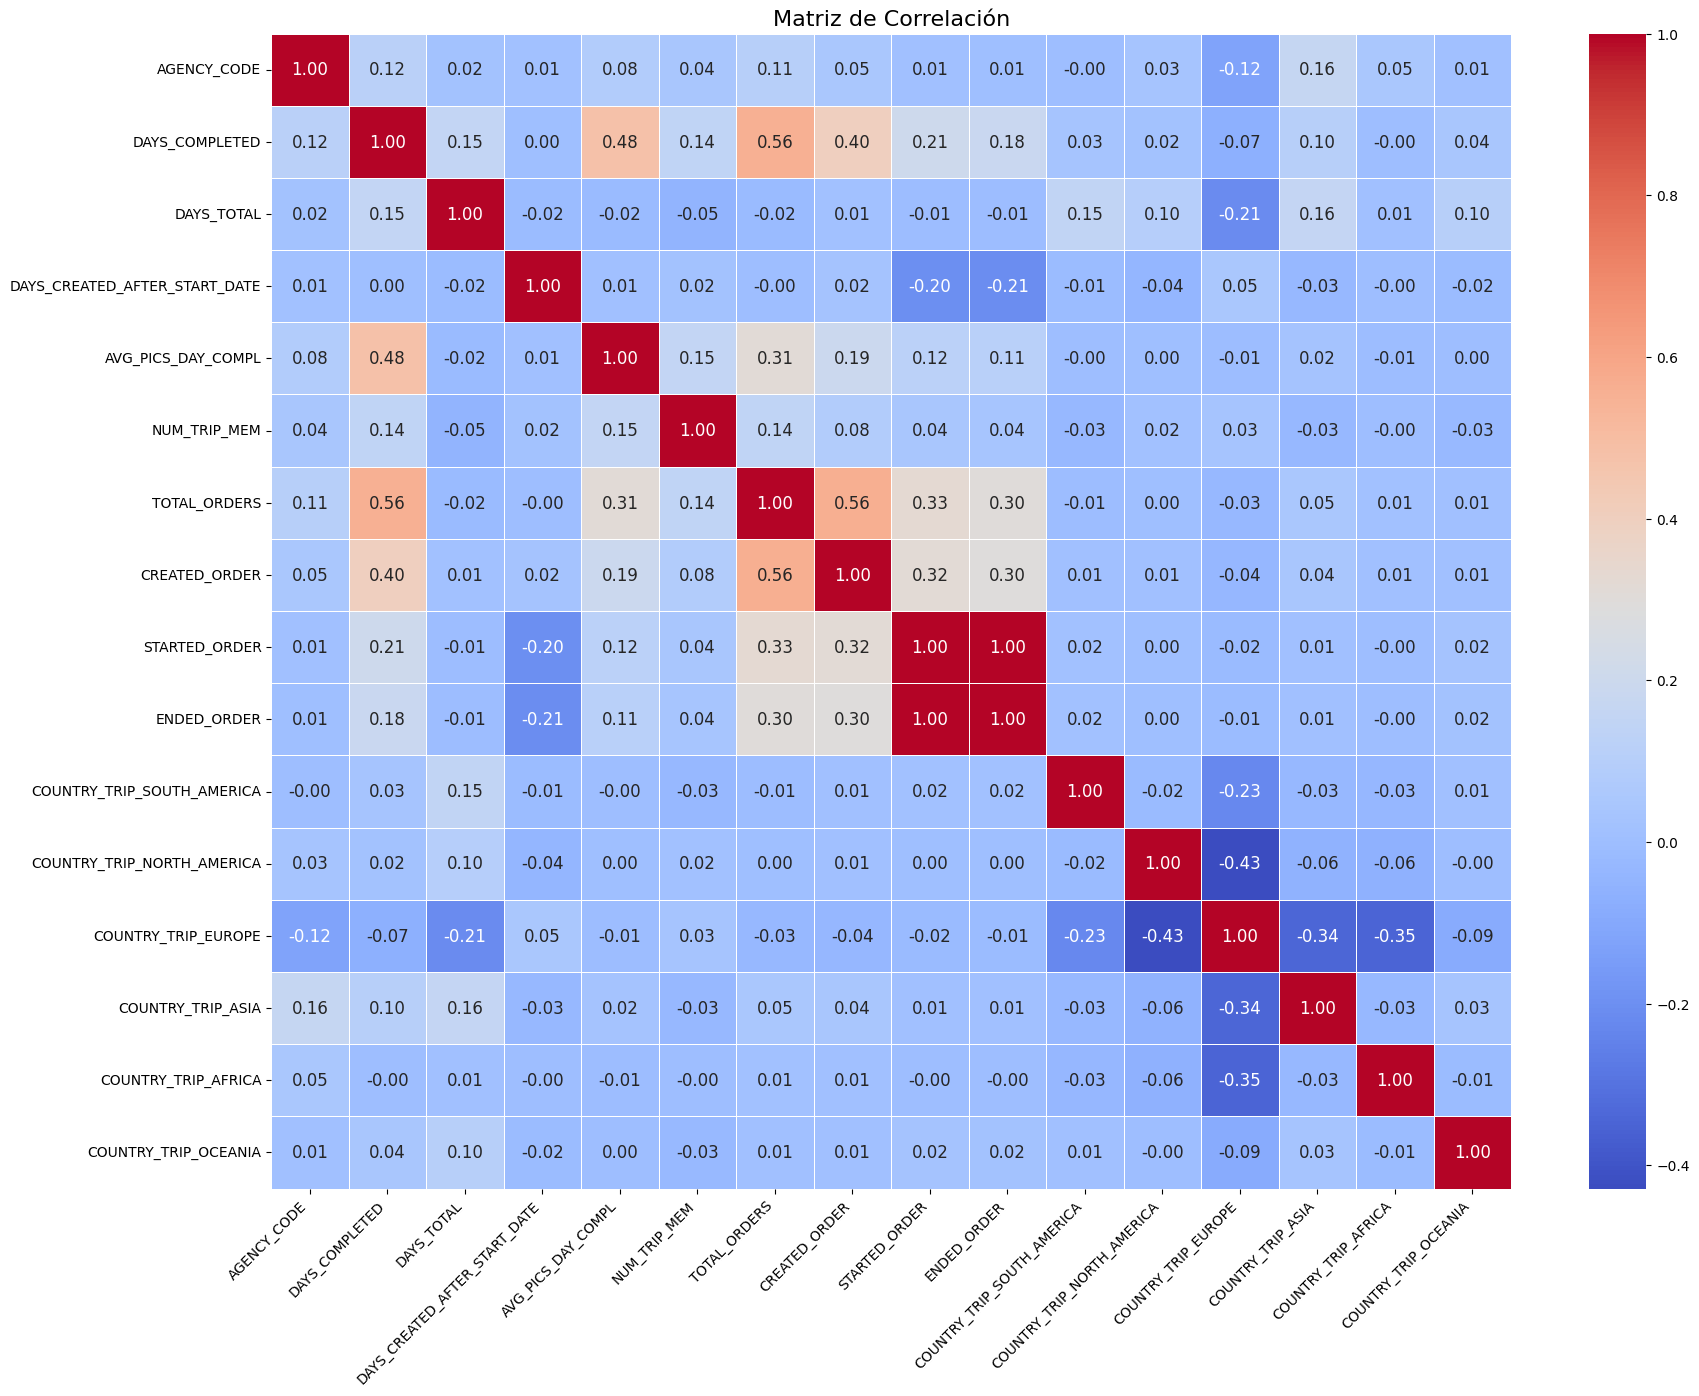

In [233]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data_final.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, annot_kws={"size": 12})

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

In [234]:
data_final = data_final.drop(columns =['STARTED_ORDER'])

In [235]:
data_binarias = data_final[['AGENCY_CODE','COUNTRY_TRIP_SOUTH_AMERICA','COUNTRY_TRIP_NORTH_AMERICA',
                            'COUNTRY_TRIP_EUROPE','COUNTRY_TRIP_ASIA','COUNTRY_TRIP_AFRICA','COUNTRY_TRIP_OCEANIA']]
data_continuas = data_final.drop(data_binarias, axis=1)

In [236]:
for column in data_continuas.columns:
    figure = px.histogram(data_continuas, x=column, marginal="box", color_discrete_sequence=["#5B9DA6"])
    figure.update_layout(title_text= f" Histograma y Boxplot de{column}", paper_bgcolor="white", plot_bgcolor="white")
    figure.show()

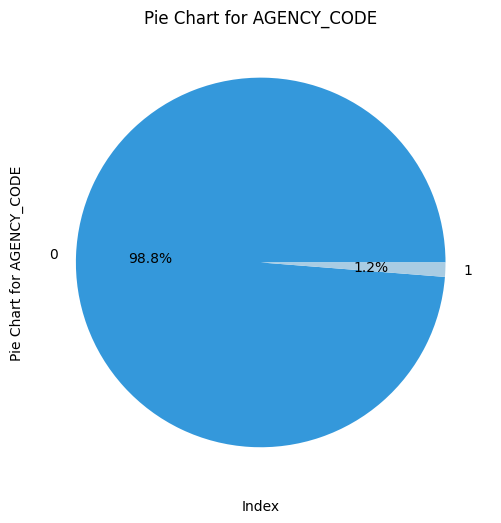

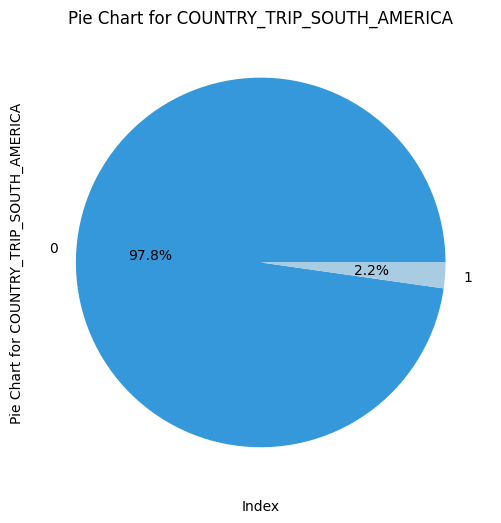

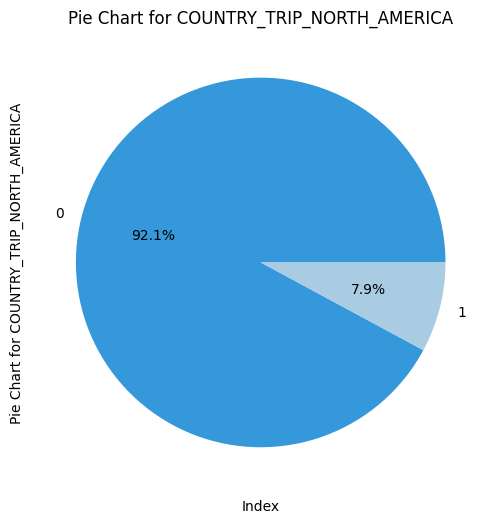

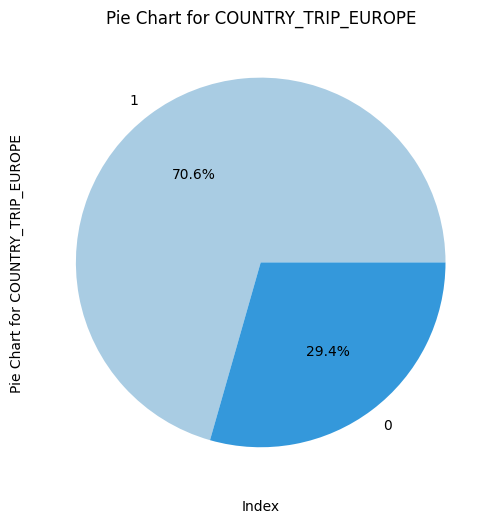

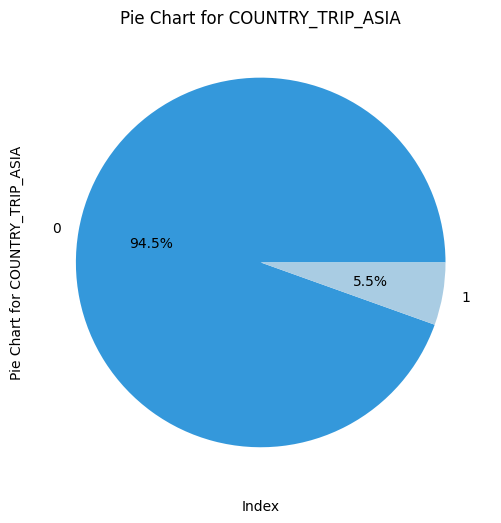

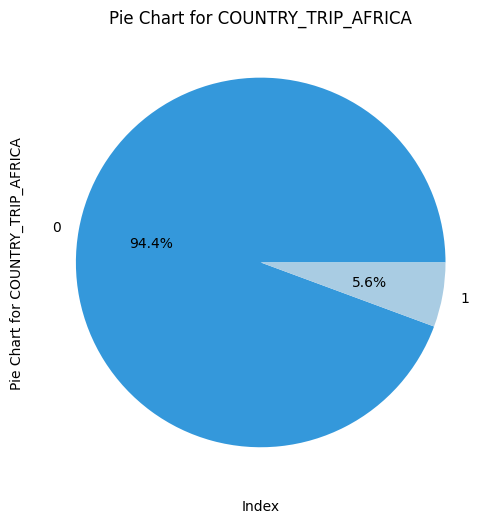

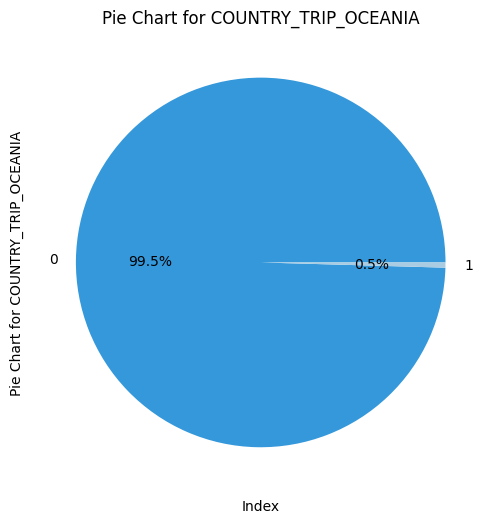

In [237]:
for column in data_binarias.columns:
    plt.figure(figsize=(8, 6))
    colors = ['#3498db' if value == 0 else '#a9cce3' for value in data_binarias[column].value_counts().index]
    plt.pie(data_binarias[column].value_counts(), labels=data_binarias[column].value_counts().index, autopct='%1.1f%%', colors=colors)
    plt.xlabel('Index')
    plt.ylabel(f'Pie Chart for {column}')
    plt.title(f'Pie Chart for {column}')
    plt.show()


In [238]:
data_final.loc[data["TOTAL_ORDERS"] != 0, "TOTAL_ORDERS"] = 1

In [239]:
data_final["TOTAL_ORDERS"].value_counts()

TOTAL_ORDERS
0    15979
1     1076
Name: count, dtype: int64

In [240]:
# frac = 0.93

# indices = data_num[data_num["TOTAL_ORDERS"] == 0].index

# np.random.seed(80)

# reduced = np.random.choice(indices, size=int(len(indices) * frac), replace=False)

# data_num = data_num.drop(set(reduced).union(set(reduced)))

# print(data_num["TOTAL_ORDERS"].value_counts())

<Figure size 1000x3000 with 0 Axes>

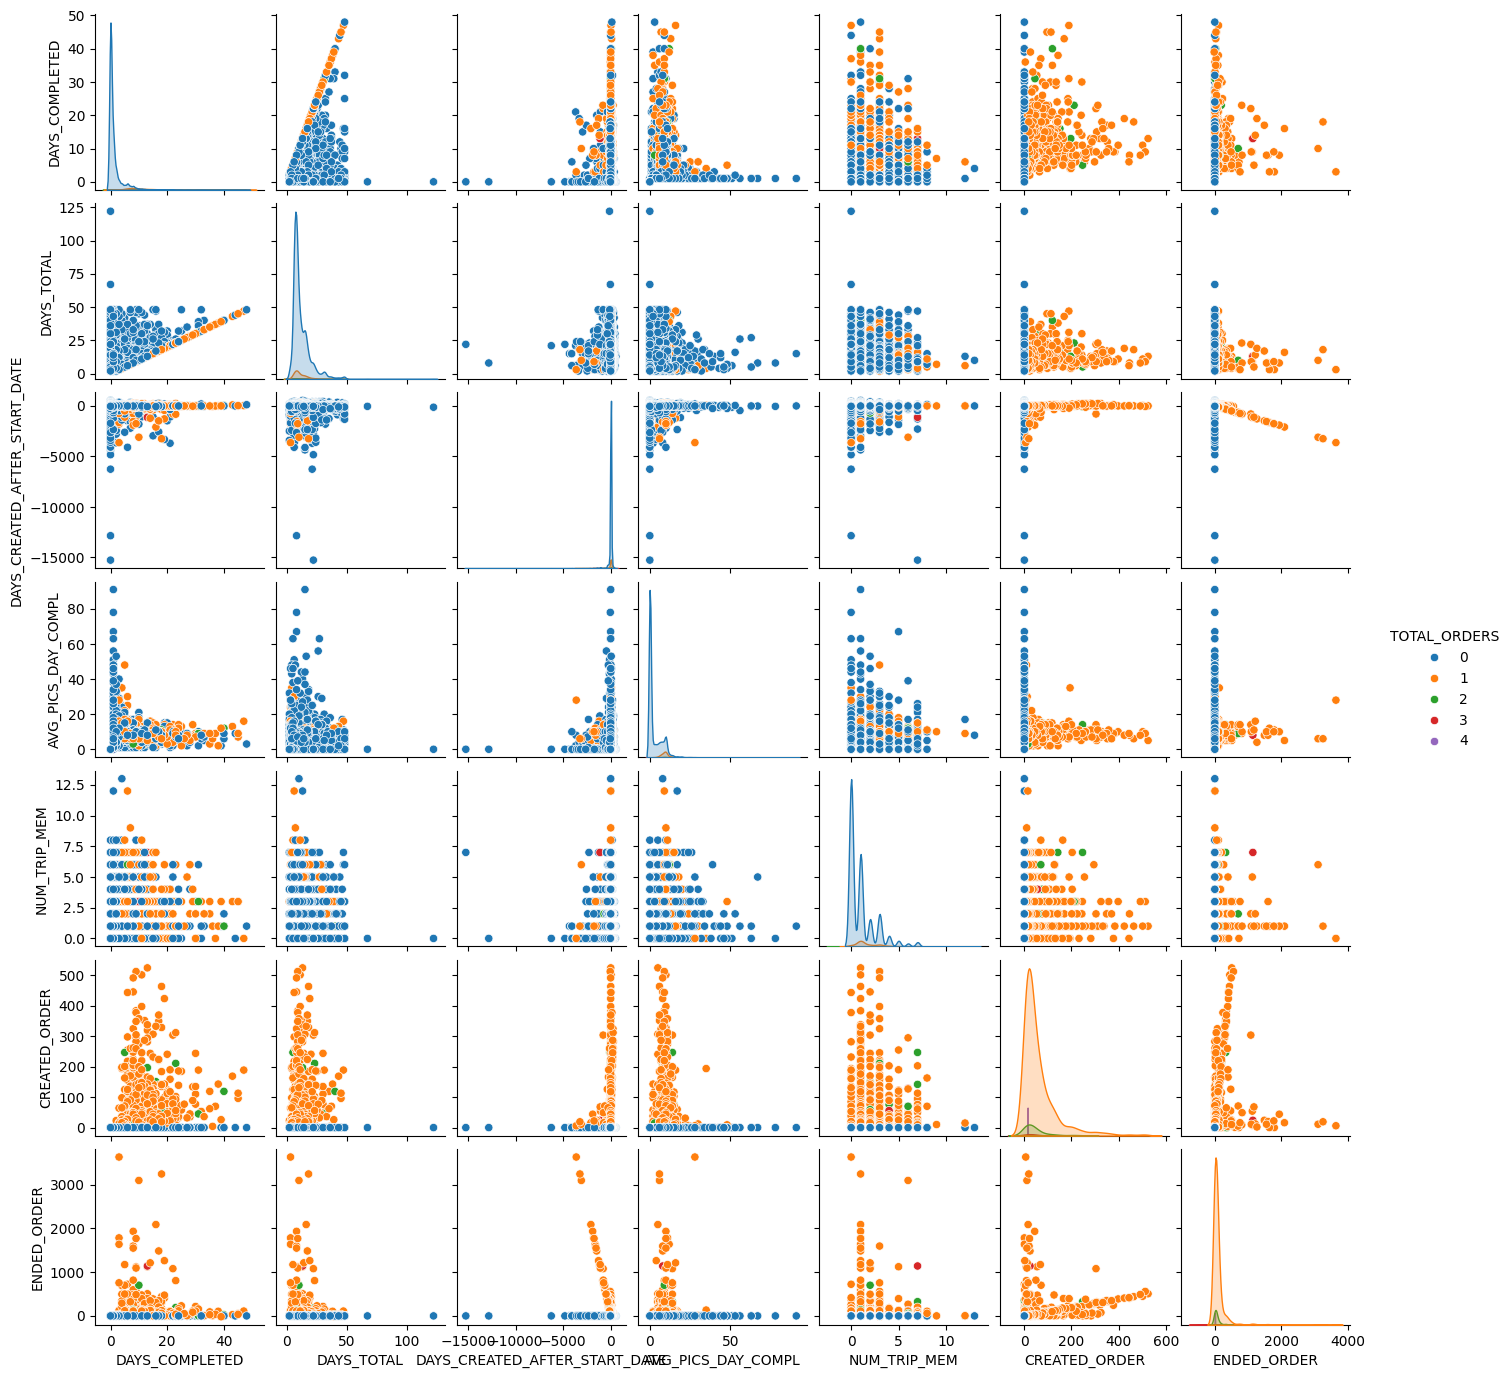

In [241]:
plt.figure(figsize=(10, 30))
sns.pairplot(data_continuas, hue="TOTAL_ORDERS", height=2, palette="tab10")
plt.show()

In [242]:
# Repaso concreto de las correalciones con la variable objetivo
correlations = data_final.corr()
corr_orders = correlations['TOTAL_ORDERS'].abs().sort_values(ascending=False)
corr_orders

TOTAL_ORDERS                     1.000000
CREATED_ORDER                    0.603767
DAYS_COMPLETED                   0.590558
AVG_PICS_DAY_COMPL               0.327483
ENDED_ORDER                      0.317131
NUM_TRIP_MEM                     0.138823
AGENCY_CODE                      0.116316
COUNTRY_TRIP_ASIA                0.051050
COUNTRY_TRIP_EUROPE              0.029856
DAYS_TOTAL                       0.017421
COUNTRY_TRIP_AFRICA              0.017121
COUNTRY_TRIP_OCEANIA             0.011303
COUNTRY_TRIP_SOUTH_AMERICA       0.006777
COUNTRY_TRIP_NORTH_AMERICA       0.003823
DAYS_CREATED_AFTER_START_DATE    0.001040
Name: TOTAL_ORDERS, dtype: float64

**PCA**

In [243]:
data_pca = data_final.drop(columns = 'TOTAL_ORDERS')

In [244]:
# PCA
pca = PCA(random_state=79)
x_pca = pca.fit_transform(data_pca)

explained_variance_ratio = pd.Series(pca.explained_variance_ratio_)
print(explained_variance_ratio.round(2))


0     0.94
1     0.05
2     0.01
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
dtype: float64


In [245]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"Componente {i+1}" for i in range(pca.components_.shape[0])]
                        , index=data_pca.columns)
loadings.round(2)

Componente 1  Componente 2  Componente 3  \
AGENCY_CODE                           -0.00          0.00          0.00   
DAYS_COMPLETED                        -0.00          0.01          0.07   
DAYS_TOTAL                             0.00         -0.00          0.01   
DAYS_CREATED_AFTER_START_DATE         -1.00          0.05         -0.01   
AVG_PICS_DAY_COMPL                    -0.00          0.01          0.04   
NUM_TRIP_MEM                          -0.00          0.00          0.00   
CREATED_ORDER                         -0.00          0.12          0.99   
ENDED_ORDER                            0.05          0.99         -0.12   
COUNTRY_TRIP_SOUTH_AMERICA             0.00          0.00          0.00   
COUNTRY_TRIP_NORTH_AMERICA             0.00         -0.00          0.00   
COUNTRY_TRIP_EUROPE                   -0.00         -0.00         -0.00   
COUNTRY_TRIP_ASIA                      0.00          0.00          0.00   
COUNTRY_TRIP_AFRICA                    0.00         -0.00          0.00   
COUNTRY_TRIP_OCEANIA                   0.00          0.00          0.00   

                               Componente 4  Componente 5  Componente 6  \
AGENCY_CODE                            0.00          0.00         -0.00   
DAYS_COMPLETED                         0.10          0.48         -0.87   
DAYS_TOTAL                             0.99         -0.05          0.09   
DAYS_CREATED_AFTER_START_DATE          0.00         -0.00          0.00   
AVG_PICS_DAY_COMPL                    -0.00          0.87          0.49   
NUM_TRIP_MEM                          -0.01          0.05         -0.02   
CREATED_ORDER                         -0.01         -0.07          0.04   
ENDED_ORDER                            0.00         -0.01          0.00   
COUNTRY_TRIP_SOUTH_AMERICA             0.00         -0.00          0.00   
COUNTRY_TRIP_NORTH_AMERICA             0.00          0.00          0.00   
COUNTRY_TRIP_EUROPE                   -0.01         -0.00          0.00   
COUNTRY_TRIP_ASIA                      0.01          0.00         -0.00   
COUNTRY_TRIP_AFRICA                    0.00         -0.00          0.00   
COUNTRY_TRIP_OCEANIA                   0.00          0.00         -0.00   

                               Componente 7  Componente 8  Componente 9  \
AGENCY_CODE                            0.00         -0.03          0.03   
DAYS_COMPLETED                        -0.04          0.00         -0.00   
DAYS_TOTAL                             0.01          0.01         -0.00   
DAYS_CREATED_AFTER_START_DATE         -0.00         -0.00         -0.00   
AVG_PICS_DAY_COMPL                    -0.03          0.00          0.00   
NUM_TRIP_MEM                           1.00         -0.01          0.01   
CREATED_ORDER                         -0.00          0.00         -0.00   
ENDED_ORDER                           -0.00         -0.00         -0.00   
COUNTRY_TRIP_SOUTH_AMERICA            -0.00         -0.05          0.03   
COUNTRY_TRIP_NORTH_AMERICA             0.00         -0.29         -0.83   
COUNTRY_TRIP_EUROPE                    0.01          0.92         -0.11   
COUNTRY_TRIP_ASIA                     -0.01         -0.15          0.35   
COUNTRY_TRIP_AFRICA                   -0.00         -0.19          0.43   
COUNTRY_TRIP_OCEANIA                  -0.00         -0.01          0.01   

                               Componente 10  Componente 11  Componente 12  \
AGENCY_CODE                            -0.05           0.07           0.09   
DAYS_COMPLETED                          0.00          -0.00          -0.00   
DAYS_TOTAL                              0.00           0.00          -0.00   
DAYS_CREATED_AFTER_START_DATE          -0.00           0.00           0.00   
AVG_PICS_DAY_COMPL                     -0.00           0.00           0.00   
NUM_TRIP_MEM                           -0.00          -0.00          -0.00   
CREATED_ORDER                           0.00          -0.00          -0.00   
ENDED_ORDER                  

El PCA només ens diu que la varialbe DAYS CREATED AFTER START DATE es la única variable que ens dona informació sobre la variable total orders, la segona que més info ens dona es la variable ENDED ORDER.

Extany, el que queda clar esque aquestes dos tenen importancia.

**Informació Mutua - Entropia**

C:\Users\Marc\AppData\Local\Temp\ipykernel_4480\1802211726.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




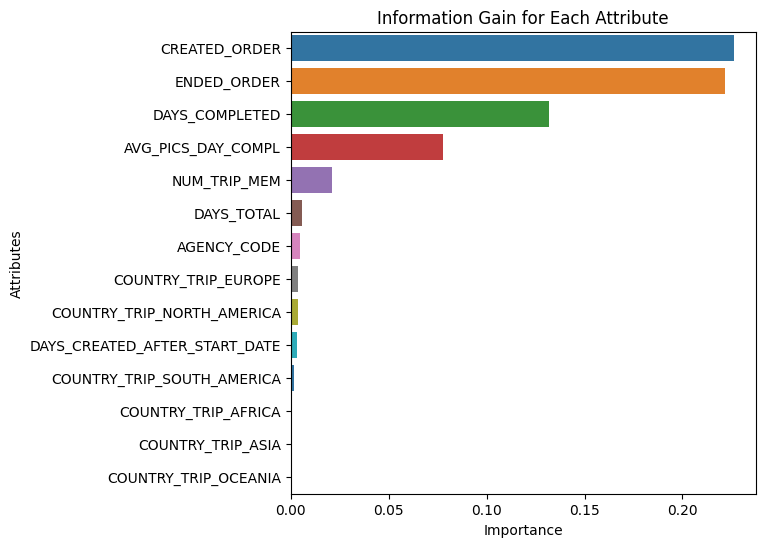

In [246]:
from sklearn.feature_selection import mutual_info_classif
info_gain = mutual_info_classif(data_pca, data_final['TOTAL_ORDERS'])

ig_df = pd.DataFrame({'attributes': data_pca.columns, 'importance': info_gain})
ig_df = ig_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='importance', y='attributes', data=ig_df, palette='tab10')
plt.title('Information Gain for Each Attribute')
plt.xlabel('Importance')
plt.ylabel('Attributes')
plt.show()

In [247]:
data_final.to_csv('App_Fotos_Dades_Netes')

# K-Means - Creació de clústers per veure quins ens interesen més


El primer l'he creat amb les variables ue semblen tenir més importancia en relació a l'objectiu a descriure, la conversió (total_orders)

In [105]:
# Balanceig les dades
frac = 0.93

indices = data_final[data_final["TOTAL_ORDERS"] == 0].index

np.random.seed(80)

reduced = np.random.choice(indices, size=int(len(indices) * frac), replace=False)

data_cluster = data_final.drop(set(reduced).union(set(reduced)))

print(data_cluster["TOTAL_ORDERS"].value_counts())

TOTAL_ORDERS
0    1119
1    1076
Name: count, dtype: int64


In [108]:
# Escalem dades
data_prescaled = data_cluster.drop(columns = 'TOTAL_ORDERS')
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_prescaled), columns = data_prescaled.columns)
data_scaled.index = data_prescaled.index
data_scaled["TOTAL_ORDERS"] = data_cluster["TOTAL_ORDERS"]

data_scaled.head()

AGENCY_CODE  DAYS_COMPLETED  DAYS_TOTAL  DAYS_CREATED_AFTER_START_DATE  \
11    -0.186787       -0.919439    0.129463                       0.448333   
20    -0.186787       -0.919439   -0.021451                       0.229884   
26    -0.186787       -0.919439    0.280377                       0.461986   
33    -0.186787       -0.919439   -0.625106                       0.158205   
45    -0.186787       -0.919439   -0.474193                       1.148054   

    AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  CREATED_ORDER  ENDED_ORDER  \
11           -1.155765     -0.297926      -0.478271    -0.234839   
20           -1.155765      0.922125      -0.478271    -0.234839   
26           -1.155765     -0.907952      -0.478271    -0.234839   
33           -1.155765     -0.297926      -0.478271    -0.234839   
45           -1.155765      0.312100      -0.478271    -0.234839   

    COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
11                   -0.137965                   -0.292504   
20                   -0.137965                   -0.292504   
26                   -0.137965                   -0.292504   
33                   -0.137965                   -0.292504   
45                   -0.137965                   -0.292504   

    COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  COUNTRY_TRIP_AFRICA  \
11            -1.467561           3.566336            -0.266935   
20             0.681403          -0.280400            -0.266935   
26             0.681403          -0.280400            -0.266935   
33             0.681403          -0.280400            -0.266935   
45             0.681403          -0.280400            -0.266935   

    COUNTRY_TRIP_OCEANIA  TOTAL_ORDERS  
11             -0.074142             0  
20             -0.074142             0  
26             -0.074142             0  
33             -0.074142             0  
45             -0.074142             0

In [86]:
data_clustering = data_scaled[['CREATED_ORDER', 'ENDED_ORDER', 
                               'DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                               'NUM_TRIP_MEM', 'COUNTRY_TRIP_EUROPE', 
                               'DAYS_CREATED_AFTER_START_DATE', 'DAYS_TOTAL']]

In [87]:
data_clustering_2 = data_scaled[['CREATED_ORDER', 'ENDED_ORDER', 
                               'DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                               'NUM_TRIP_MEM', 'AGENCY_CODE']]

c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


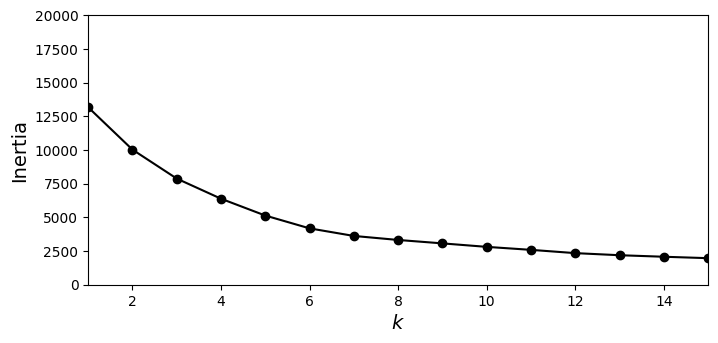

In [88]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=33, n_init=20).fit(data_clustering_2) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 15, 0, 20000])
plt.show()

In [89]:
print(inertias)

[13170.000000000004, 10026.017483847976, 7877.210921268796, 6382.547697541483, 5133.430545526811, 4182.017182152466, 3619.668145798059, 3321.551986778482, 3067.811307898455, 2809.6312665320083, 2587.595134941461, 2344.6201920248686, 2189.691652764867, 2075.5958476655587, 1970.6669381189272, 1847.8701429022312, 1768.5075903081831, 1663.263525276253, 1594.9128776910902]


In [90]:
kmeans_model = KMeans(n_clusters=4, random_state=33, n_init=20)
kmeans_model.fit(data_clustering_2)

labels = kmeans_model.labels_

df_kmeans = pd.DataFrame(data_clustering_2, columns=['CREATED_ORDER', 'ENDED_ORDER', 
                               'DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                               'NUM_TRIP_MEM', 'AGENCY_CODE'])

df_kmeans["CLUSTER"] = labels 

In [91]:
df_kmeans.head()

CREATED_ORDER  ENDED_ORDER  DAYS_COMPLETED  AVG_PICS_DAY_COMPL  \
11      -0.478271    -0.234839       -0.919439           -1.155765   
20      -0.478271    -0.234839       -0.919439           -1.155765   
26      -0.478271    -0.234839       -0.919439           -1.155765   
33      -0.478271    -0.234839       -0.919439           -1.155765   
45      -0.478271    -0.234839       -0.919439           -1.155765   

    NUM_TRIP_MEM  AGENCY_CODE  CLUSTER  
11     -0.297926    -0.186787        0  
20      0.922125    -0.186787        0  
26     -0.907952    -0.186787        0  
33     -0.297926    -0.186787        0  
45      0.312100    -0.186787        0

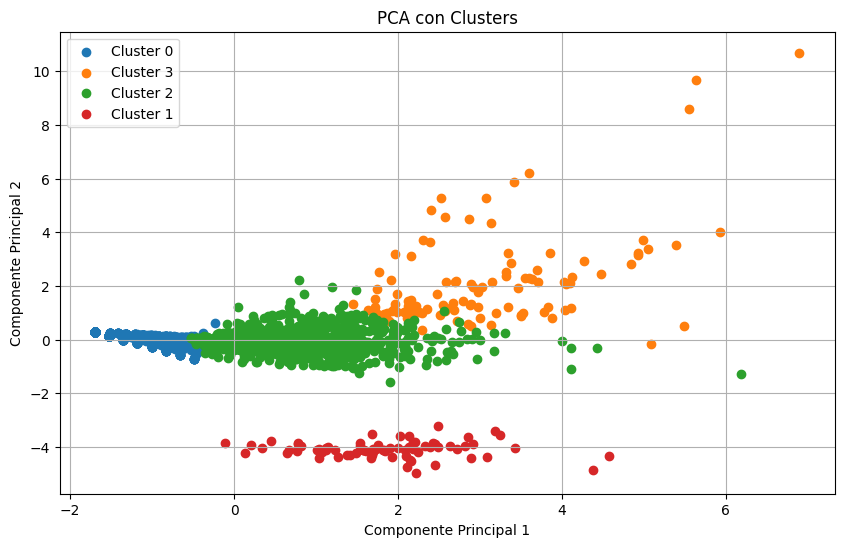

In [92]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_clustering_2)

labels = kmeans_model.labels_

df_pca = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(10, 6))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_1'],
                df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_2'],
                label=f'Cluster {cluster}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA con Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
df_kmeans["CLUSTER"].value_counts()

CLUSTER
2    1103
0     909
3     109
1      74
Name: count, dtype: int64

In [94]:
data_cluster_final = data_cluster[['CREATED_ORDER', 'ENDED_ORDER', 
                               'DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                               'NUM_TRIP_MEM', 'AGENCY_CODE', 'TOTAL_ORDERS']]
data_cluster_final.head()

CREATED_ORDER  ENDED_ORDER  DAYS_COMPLETED  AVG_PICS_DAY_COMPL  \
11            0.0          0.0               0                 0.0   
20            0.0          0.0               0                 0.0   
26            0.0          0.0               0                 0.0   
33            0.0          0.0               0                 0.0   
45            0.0          0.0               0                 0.0   

    NUM_TRIP_MEM  AGENCY_CODE  TOTAL_ORDERS  
11             1            0             0  
20             3            0             0  
26             0            0             0  
33             1            0             0  
45             2            0             0

In [95]:
clusters_merged = pd.merge(data_cluster_final, df_kmeans[['CLUSTER']], 
                    left_index = True, right_index =True)

In [96]:
print(df_kmeans.shape)
print(data_cluster.shape)
print(clusters_merged.shape)

(2195, 7)
(2195, 15)
(2195, 8)


In [97]:
clusters_merged.head()

CREATED_ORDER  ENDED_ORDER  DAYS_COMPLETED  AVG_PICS_DAY_COMPL  \
11            0.0          0.0               0                 0.0   
20            0.0          0.0               0                 0.0   
26            0.0          0.0               0                 0.0   
33            0.0          0.0               0                 0.0   
45            0.0          0.0               0                 0.0   

    NUM_TRIP_MEM  AGENCY_CODE  TOTAL_ORDERS  CLUSTER  
11             1            0             0        0  
20             3            0             0        0  
26             0            0             0        0  
33             1            0             0        0  
45             2            0             0        0

In [98]:
clusters_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2195 entries, 11 to 17542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CREATED_ORDER       2195 non-null   float64
 1   ENDED_ORDER         2195 non-null   float64
 2   DAYS_COMPLETED      2195 non-null   int64  
 3   AVG_PICS_DAY_COMPL  2195 non-null   float64
 4   NUM_TRIP_MEM        2195 non-null   int64  
 5   AGENCY_CODE         2195 non-null   int32  
 6   TOTAL_ORDERS        2195 non-null   int64  
 7   CLUSTER             2195 non-null   int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 201.7 KB


In [99]:
datasets_por_cluster = {}

clusters_unique = clusters_merged["CLUSTER"].unique()

for cluster in clusters_unique:
    cluster_data = clusters_merged[clusters_merged['CLUSTER'] == cluster]

    datasets_por_cluster[cluster] = cluster_data

data_cluster0 = datasets_por_cluster[0]
data_cluster1 = datasets_por_cluster[1]
data_cluster2 = datasets_por_cluster[2]
data_cluster3 = datasets_por_cluster[3]

TOTAL_ORDERS
0    903
1      6
Name: count, dtype: int64


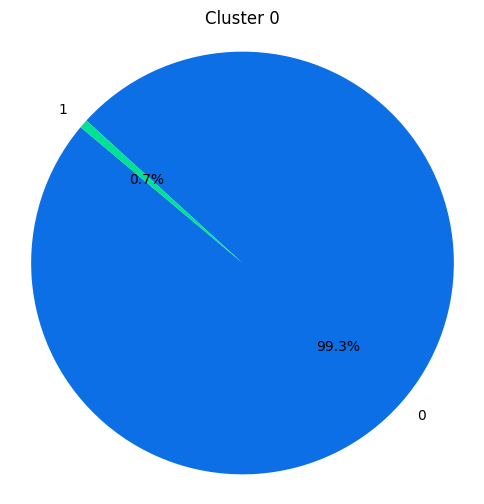

In [100]:
total_orders_counts = data_cluster0["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

total_orders_data = data_cluster0['TOTAL_ORDERS']

colors = ['#0D6FE5', '#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title("Cluster 0")
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    67
0     7
Name: count, dtype: int64


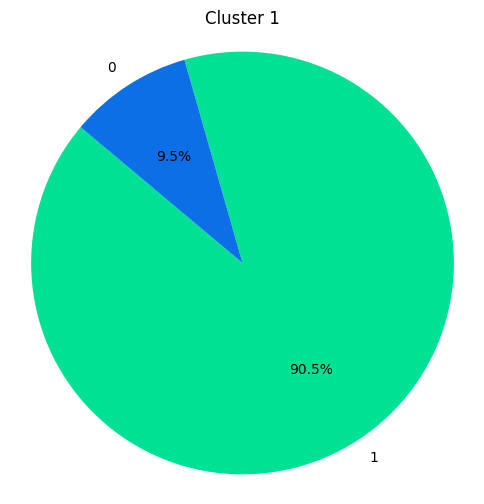

In [101]:
total_orders_counts = data_cluster1["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 1')
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    894
0    209
Name: count, dtype: int64


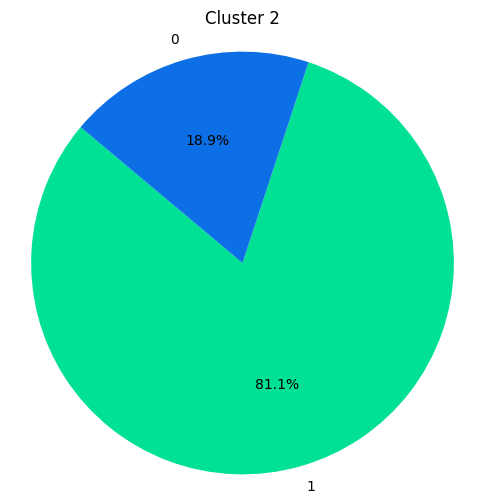

In [102]:
total_orders_counts = data_cluster2["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 2')
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    109
Name: count, dtype: int64


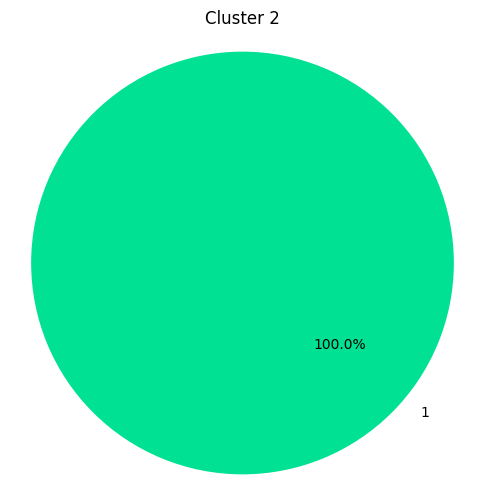

In [103]:
total_orders_counts = data_cluster3["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 2')
plt.axis('equal')
plt.show()

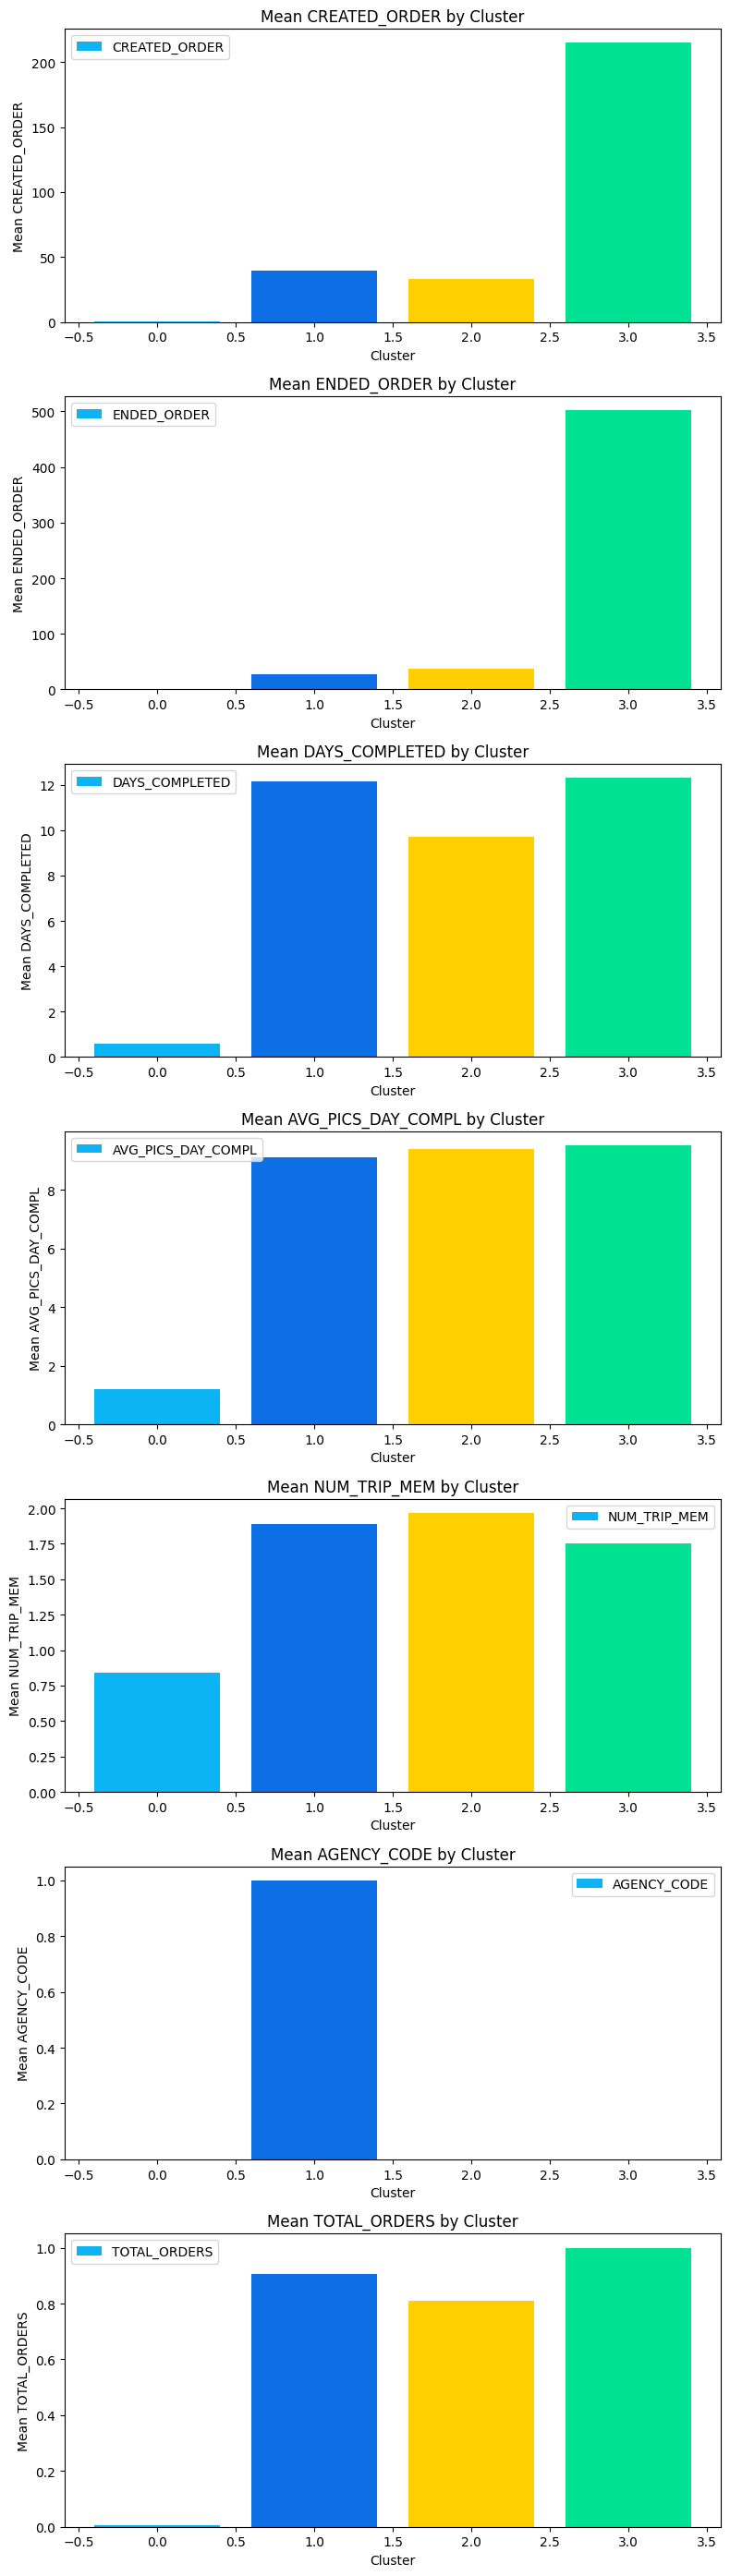

In [104]:
means_df = clusters_merged.groupby('CLUSTER').mean()

selected_clusters = [0, 1, 2, 3]
filter_cluster = means_df.loc[selected_clusters]

clusters = filter_cluster.index
columns = filter_cluster.columns

cluster_colors = ['#0DB4F3', '#0D6FE5', '#FFCF00', '#00E194']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))

for i, column in enumerate(columns):
    axes[i].bar(clusters, filter_cluster[column], color=cluster_colors, label=column)
    axes[i].set_ylabel('Mean ' + column)
    axes[i].set_xlabel('Cluster')
    axes[i].set_title('Mean ' + column + ' by Cluster')
    axes[i].legend()

plt.tight_layout()
plt.show()

Aquest primer model no serveix de massa res, al final estem posant 3 variables que estan creades en base a si hi ha venta o no, llavors el que fa es primer separar entre venta o no venta i llavor segrega dins els qe han venut, que son els últims 3 clusters.

# K-Means - Amb totes les variables

In [105]:
k_means_2 = data_scaled.drop(columns = 'TOTAL_ORDERS')

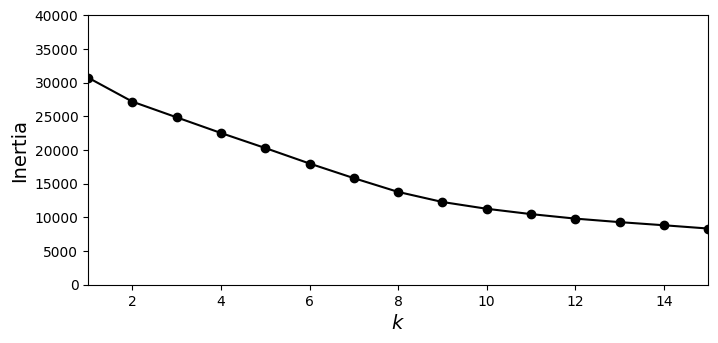

In [106]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=33, n_init=20).fit(k_means_2) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 15, 0, 40000])
plt.show()

In [107]:
kmeans_model_2 = KMeans(n_clusters=4, random_state=33, n_init=20)
kmeans_model_2.fit(data_clustering_2)

labels = kmeans_model_2.labels_

df_kmeans_2 = pd.DataFrame(k_means_2)

df_kmeans_2["CLUSTER"] = labels 

In [108]:
df_kmeans_2.head()

AGENCY_CODE  DAYS_COMPLETED  DAYS_TOTAL  DAYS_CREATED_AFTER_START_DATE  \
11    -0.186787       -0.919439    0.129463                       0.448333   
20    -0.186787       -0.919439   -0.021451                       0.229884   
26    -0.186787       -0.919439    0.280377                       0.461986   
33    -0.186787       -0.919439   -0.625106                       0.158205   
45    -0.186787       -0.919439   -0.474193                       1.148054   

    AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  CREATED_ORDER  ENDED_ORDER  \
11           -1.155765     -0.297926      -0.478271    -0.234839   
20           -1.155765      0.922125      -0.478271    -0.234839   
26           -1.155765     -0.907952      -0.478271    -0.234839   
33           -1.155765     -0.297926      -0.478271    -0.234839   
45           -1.155765      0.312100      -0.478271    -0.234839   

    COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
11                   -0.137965                   -0.292504   
20                   -0.137965                   -0.292504   
26                   -0.137965                   -0.292504   
33                   -0.137965                   -0.292504   
45                   -0.137965                   -0.292504   

    COUNTRY_TRIP_EUROPE  COUNTRY_TRIP_ASIA  COUNTRY_TRIP_AFRICA  \
11            -1.467561           3.566336            -0.266935   
20             0.681403          -0.280400            -0.266935   
26             0.681403          -0.280400            -0.266935   
33             0.681403          -0.280400            -0.266935   
45             0.681403          -0.280400            -0.266935   

    COUNTRY_TRIP_OCEANIA  CLUSTER  
11             -0.074142        0  
20             -0.074142        0  
26             -0.074142        0  
33             -0.074142        0  
45             -0.074142        0

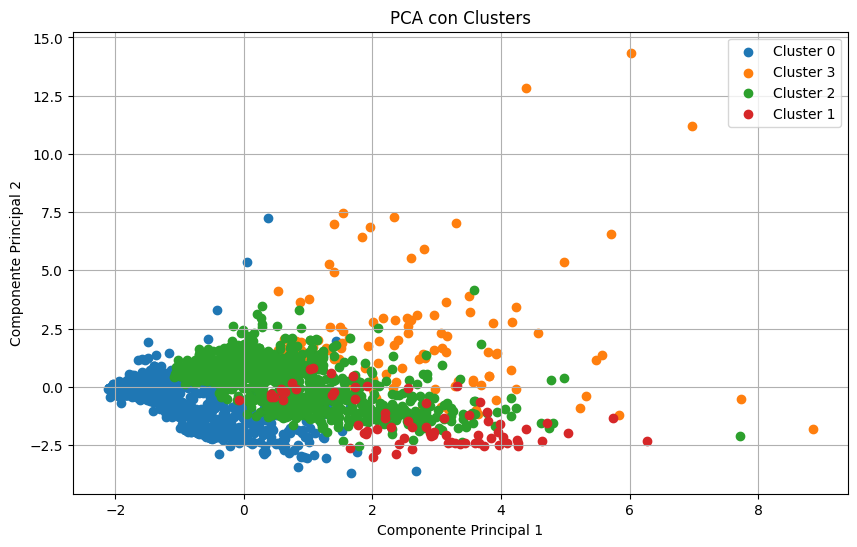

In [109]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(k_means_2)

labels = kmeans_model_2.labels_

df_pca = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(10, 6))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_1'],
                df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_2'],
                label=f'Cluster {cluster}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA con Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
df_kmeans_2["CLUSTER"].value_counts()

CLUSTER
2    1103
0     909
3     109
1      74
Name: count, dtype: int64

In [111]:
clusters_merged_2 = pd.merge(data_cluster, df_kmeans_2[['CLUSTER']], 
                    left_index = True, right_index =True)

In [112]:
clusters_merged_2 = clusters_merged_2[clusters_merged_2['CLUSTER'] != 1]

In [113]:
datasets_por_cluster = {}

clusters = clusters_merged_2["CLUSTER"].unique()

for cluster in clusters:
    cluster_data = clusters_merged_2[clusters_merged_2['CLUSTER'] == cluster]

    datasets_por_cluster[cluster] = cluster_data

data_cluster0 = datasets_por_cluster[0]
data_cluster2 = datasets_por_cluster[2]
data_cluster3 = datasets_por_cluster[3]

TOTAL_ORDERS
0    903
1      6
Name: count, dtype: int64


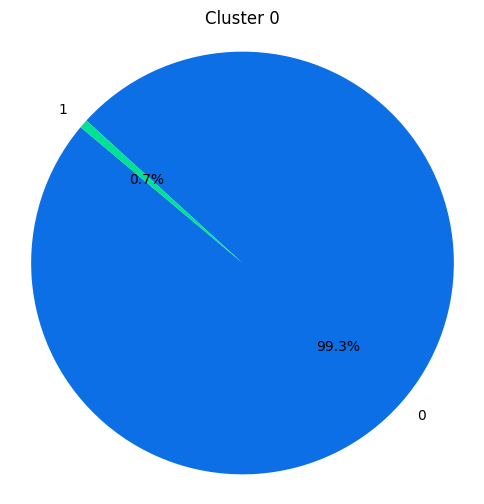

In [114]:
total_orders_counts = data_cluster0["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

total_orders_data = data_cluster0['TOTAL_ORDERS']

colors = ['#0D6FE5', '#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title("Cluster 0")
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    894
0    209
Name: count, dtype: int64


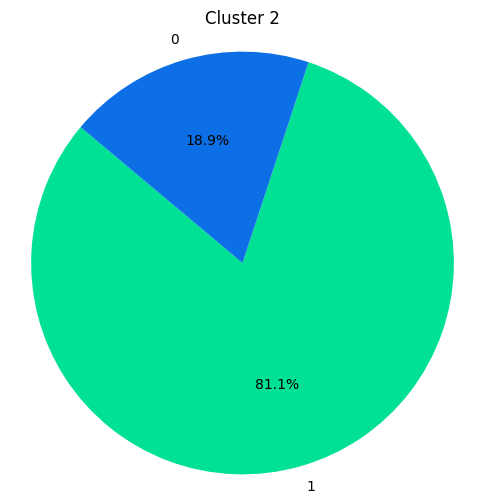

In [115]:
total_orders_counts = data_cluster2["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 2')
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    109
Name: count, dtype: int64


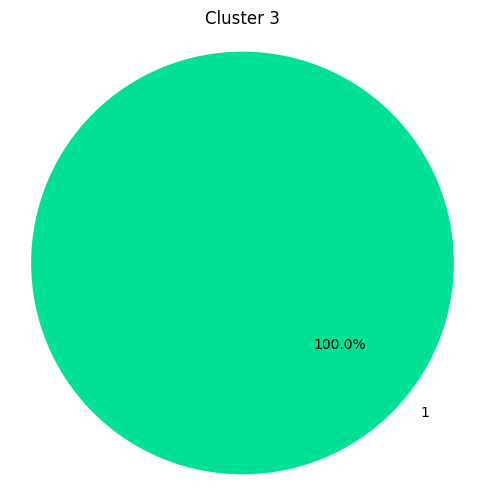

In [116]:
total_orders_counts = data_cluster3["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 3')
plt.axis('equal')
plt.show()

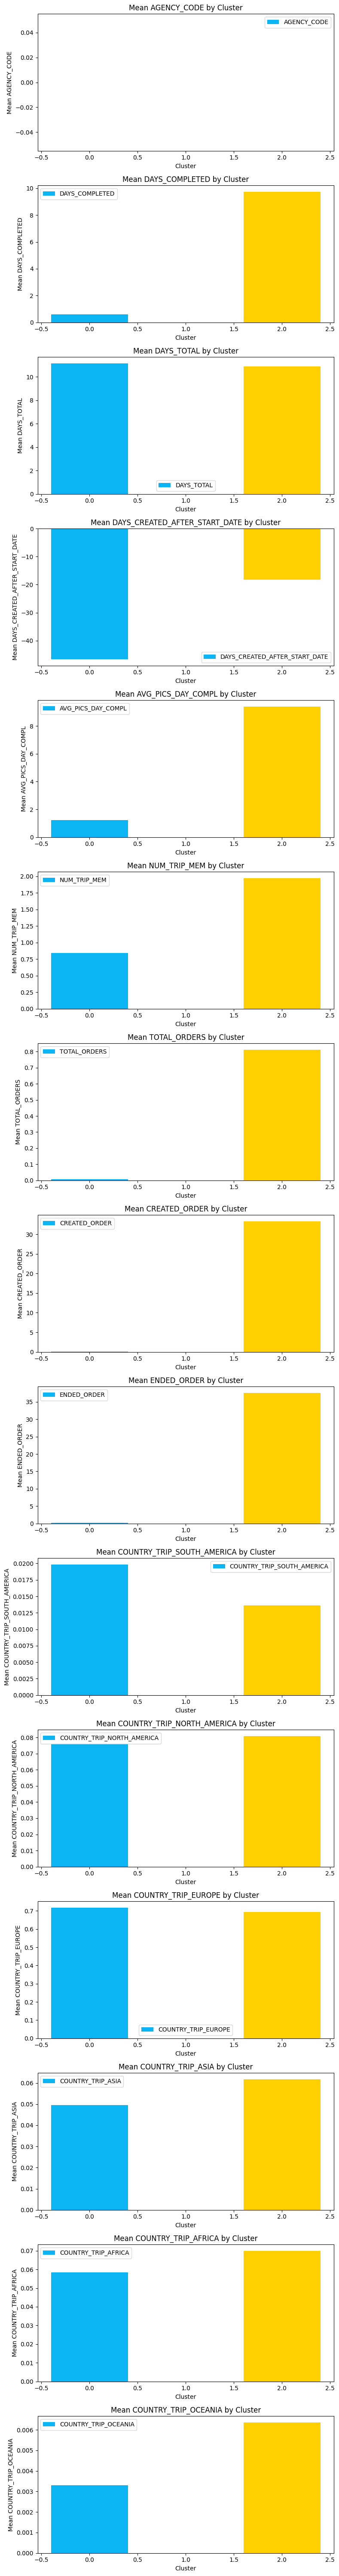

In [117]:
# Ignorem el cluster 3 per un moment (109 obs nomes)
means_df = clusters_merged_2.groupby('CLUSTER').mean()

selected_clusters = [0, 2]
filter_cluster = means_df.loc[selected_clusters]

clusters = filter_cluster.index
columns = filter_cluster.columns

cluster_colors = ['#0DB4F3', '#FFCF00', '#00E194']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))

for i, column in enumerate(columns):
    axes[i].bar(clusters, filter_cluster[column], color=cluster_colors, label=column)
    axes[i].set_ylabel('Mean ' + column)
    axes[i].set_xlabel('Cluster')
    axes[i].set_title('Mean ' + column + ' by Cluster')
    axes[i].legend()

plt.tight_layout()
plt.show()

Segueix sense servir de massa res, ens crea 4 clusters, un de observacions que no han convertit i els altres 3 de diferencies entre observacions que converteixen, seguim incluint 3 variables que nomes son variables actives en casa de tenir una order date, per tant, força a crear aquests clusters depenent molt de si hi ha order o no.

# K-Means: Eliminarem variables

Després de crear aquests dos models, m'he adonat que hi ha variables que estan afectan als resultats pero que no aporten informació, sobretot les variables created orders, agency i ended orders, nomes son variables utils per diferenciar entre observacions que covnerteixen en albums, i en auqest cas volem diferenciar entre observacions per veure quines converteixen i quines no.



In [87]:
variables = data_cluster[['DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                        'NUM_TRIP_MEM', 'DAYS_CREATED_AFTER_START_DATE',
                        'DAYS_TOTAL', 'COUNTRY_TRIP_EUROPE', 'COUNTRY_TRIP_ASIA',
                        'COUNTRY_TRIP_SOUTH_AMERICA', 'COUNTRY_TRIP_NORTH_AMERICA',
                        'COUNTRY_TRIP_OCEANIA','COUNTRY_TRIP_AFRICA']]
last_kmeans = pd.DataFrame(StandardScaler().fit_transform(variables), columns = variables.columns)
last_kmeans.index = data_prescaled.index
last_kmeans["TOTAL_ORDERS"] = data_cluster["TOTAL_ORDERS"]

last_kmeans.head()

DAYS_COMPLETED  AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  \
11       -0.919439           -1.155765     -0.297926   
20       -0.919439           -1.155765      0.922125   
26       -0.919439           -1.155765     -0.907952   
33       -0.919439           -1.155765     -0.297926   
45       -0.919439           -1.155765      0.312100   

    DAYS_CREATED_AFTER_START_DATE  DAYS_TOTAL  COUNTRY_TRIP_EUROPE  \
11                       0.448333    0.129463            -1.467561   
20                       0.229884   -0.021451             0.681403   
26                       0.461986    0.280377             0.681403   
33                       0.158205   -0.625106             0.681403   
45                       1.148054   -0.474193             0.681403   

    COUNTRY_TRIP_ASIA  COUNTRY_TRIP_SOUTH_AMERICA  COUNTRY_TRIP_NORTH_AMERICA  \
11           3.566336                   -0.137965                   -0.292504   
20          -0.280400                   -0.137965                   -0.292504   
26          -0.280400                   -0.137965                   -0.292504   
33          -0.280400                   -0.137965                   -0.292504   
45          -0.280400                   -0.137965                   -0.292504   

    COUNTRY_TRIP_OCEANIA  COUNTRY_TRIP_AFRICA  TOTAL_ORDERS  
11             -0.074142            -0.266935             0  
20             -0.074142            -0.266935             0  
26             -0.074142            -0.266935             0  
33             -0.074142            -0.266935             0  
45             -0.074142            -0.266935             0

In [88]:
clustering_all = last_kmeans[['DAYS_COMPLETED', 'AVG_PICS_DAY_COMPL', 
                        'NUM_TRIP_MEM', 'DAYS_CREATED_AFTER_START_DATE',
                        'DAYS_TOTAL', 'COUNTRY_TRIP_EUROPE', 'COUNTRY_TRIP_ASIA',
                        'COUNTRY_TRIP_SOUTH_AMERICA', 'COUNTRY_TRIP_NORTH_AMERICA',
                        'COUNTRY_TRIP_OCEANIA','COUNTRY_TRIP_AFRICA']]

c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


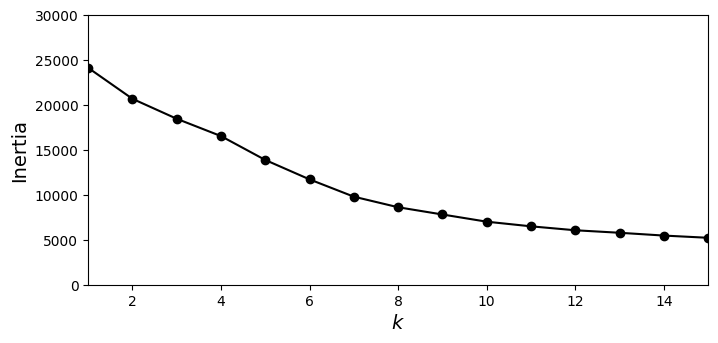

In [89]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=33, n_init=20).fit(clustering_all) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 15, 0, 30000])
plt.show()

In [90]:
kmeans_model_4 = KMeans(n_clusters=2, random_state=33, n_init=20)
kmeans_model_4.fit(clustering_all)

labels = kmeans_model_4.labels_

kmeans = pd.DataFrame(clustering_all)

kmeans["CLUSTER"] = labels 

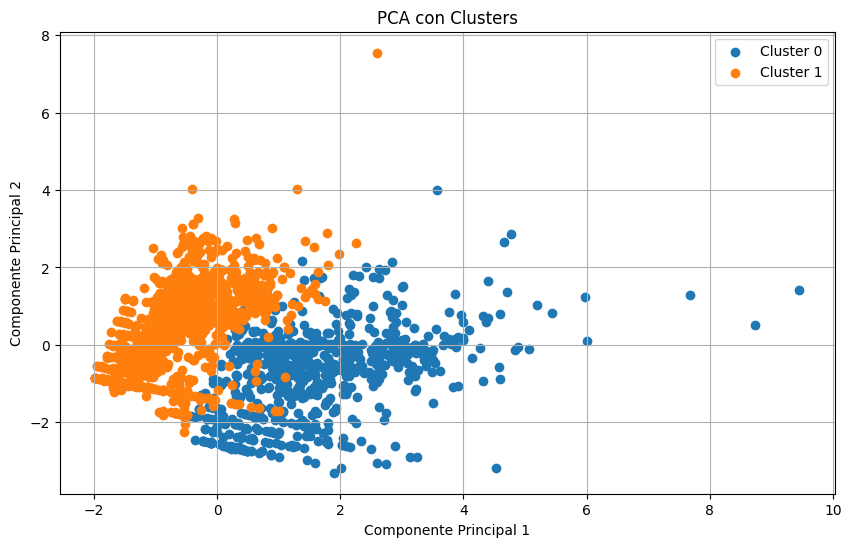

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(clustering_all)

labels = kmeans_model_4.labels_

df_pca = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(10, 6))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_1'],
                df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_2'],
                label=f'Cluster {cluster}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA con Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
kmeans["CLUSTER"].value_counts()

CLUSTER
1    1506
0     689
Name: count, dtype: int64

In [93]:
merged_kmeans = pd.merge(data_cluster, kmeans[['CLUSTER']], 
                    left_index = True, right_index =True)

In [94]:
print(merged_kmeans.shape)

(2195, 16)


In [95]:
datasets_por_cluster = {}

clusters_unique = merged_kmeans["CLUSTER"].unique()

for cluster in clusters_unique:
    cluster_data = merged_kmeans[merged_kmeans['CLUSTER'] == cluster]

    datasets_por_cluster[cluster] = cluster_data

data_cluster0 = datasets_por_cluster[0]
data_cluster1 = datasets_por_cluster[1]


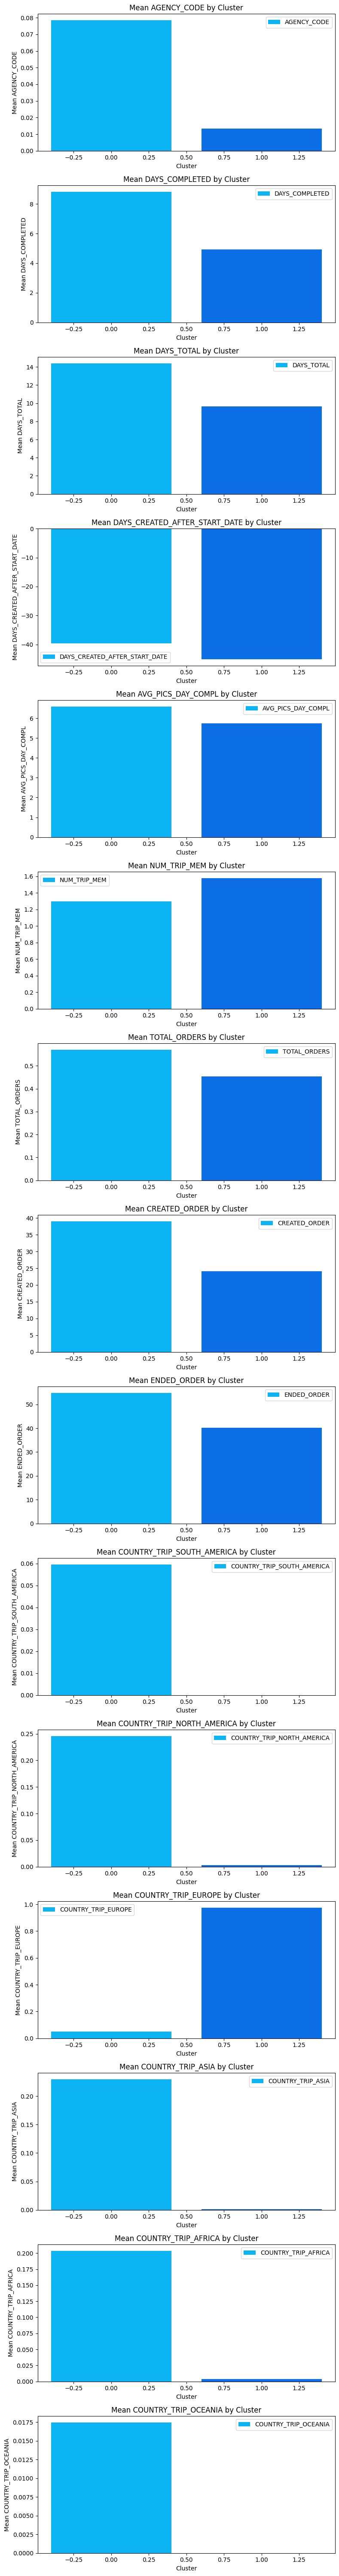

In [96]:
means_df = merged_kmeans.groupby('CLUSTER').mean()

selected_clusters = [0, 1]
filter_cluster = means_df.loc[selected_clusters]

clusters = filter_cluster.index
columns = filter_cluster.columns

cluster_colors = ['#0DB4F3', '#0D6FE5']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))

for i, column in enumerate(columns):
    axes[i].bar(clusters, filter_cluster[column], color=cluster_colors, label=column)
    axes[i].set_ylabel('Mean ' + column)
    axes[i].set_xlabel('Cluster')
    axes[i].set_title('Mean ' + column + ' by Cluster')
    axes[i].legend()

plt.tight_layout()
plt.show()

Aquest Kmeans en canvi, el que fa es crear-nos dos clusters ben diferenciats molt centrats en els països visitats per cada un dels nostres viatgers. Si ens fixem, la diferencia de conversió es baixa i com que estem introduint 6 variables centrades en on es fan els viatges, el que fa es separar entre europa i la resta de destinacions. No esta mal perquè combina això i treu que la conversió es millor en un tipus de pais. Però la diferencia es petita.
- Les variables exncloses al model, agency, ended i started, les podem incloure en la taula post kmeans i en els grafics per veure quines dades ens donene de cada un dels grups creats? Crec que si, per aixo hi son

Tenint en compte que europa es del que tenim més mostres, estaria guai veure el model aquest només inlcuint europa per baixar una mica la importancia d'aquest concepte.

# K-means - Incluim variable Europe

In [133]:
variables = ["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM","COUNTRY_TRIP_EUROPE"]
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_cluster[variables]), columns = variables)
data_scaled.index = data_cluster.index
data_scaled["TOTAL_ORDERS"] = data_cluster["TOTAL_ORDERS"]

data_scaled.head()

DAYS_COMPLETED  DAYS_TOTAL  DAYS_CREATED_AFTER_START_DATE  \
11       -0.919439    0.129463                       0.448333   
20       -0.919439   -0.021451                       0.229884   
26       -0.919439    0.280377                       0.461986   
33       -0.919439   -0.625106                       0.158205   
45       -0.919439   -0.474193                       1.148054   

    AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  COUNTRY_TRIP_EUROPE  TOTAL_ORDERS  
11           -1.155765     -0.297926            -1.467561             0  
20           -1.155765      0.922125             0.681403             0  
26           -1.155765     -0.907952             0.681403             0  
33           -1.155765     -0.297926             0.681403             0  
45           -1.155765      0.312100             0.681403             0

In [134]:
data_clustering = data_scaled[["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM","COUNTRY_TRIP_EUROPE"]]

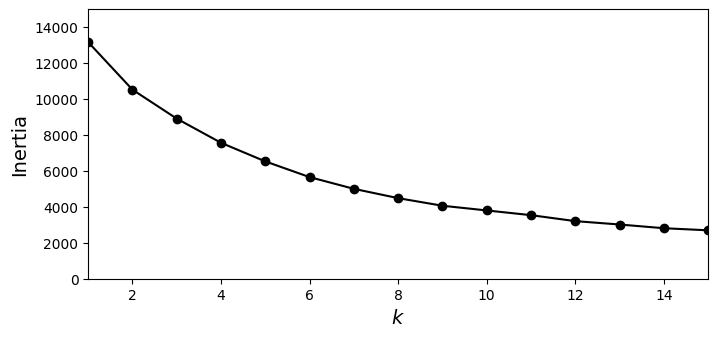

In [137]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=33, n_init=20).fit(data_clustering) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 15, 0, 15000])
plt.show()

In [138]:
kmeans_model = KMeans(n_clusters=4, random_state=33, n_init=20)
kmeans_model.fit(data_clustering)

labels = kmeans_model.labels_

df_kmeans = pd.DataFrame(data_clustering, columns=["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM","COUNTRY_TRIP_EUROPE"])

df_kmeans["CLUSTER"] = labels

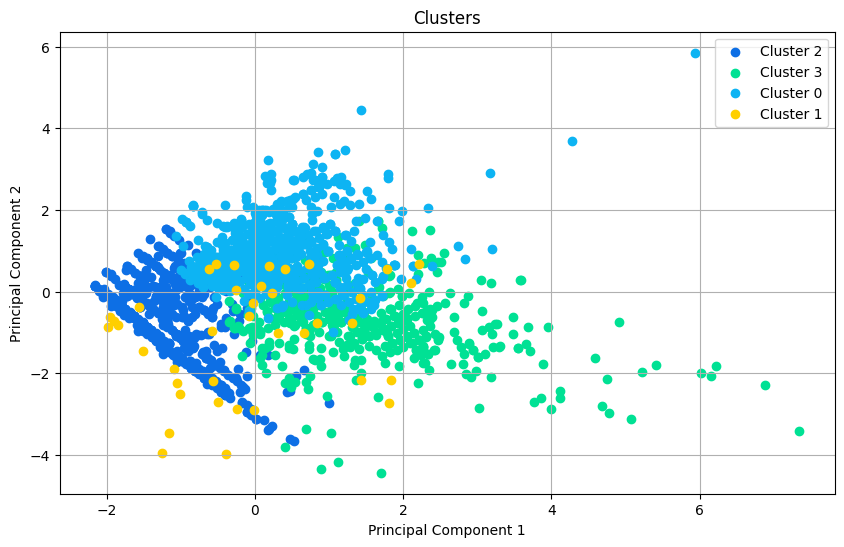

In [139]:
pca = PCA(n_components=2)
data_clustering = df_kmeans[["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM","COUNTRY_TRIP_EUROPE"]]
X_pca = pca.fit_transform(data_clustering)

labels = kmeans_model.labels_

df_pca = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])
df_pca['Cluster'] = labels

colors = ['#0D6FE5', '#00E194', '#0DB4F3', '#FFCF00']

plt.figure(figsize=(10, 6))
for cluster, color in zip(df_pca['Cluster'].unique(), colors):
        plt.scatter(df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_1'],
                    df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_2'],
                    label=f'Cluster {cluster}', color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
df_kmeans["CLUSTER"].value_counts()

CLUSTER
0    864
2    775
3    517
1     39
Name: count, dtype: int64

In [141]:
new_data = pd.merge(data_cluster, df_kmeans[['CLUSTER']], left_index=True, right_index=True)


In [156]:
datasets_por_cluster = {}

clusters = new_data["CLUSTER"].unique()

for cluster in clusters:
    cluster_data = new_data[new_data['CLUSTER'] == cluster]

    datasets_por_cluster[cluster] = cluster_data

data_cluster0 = datasets_por_cluster[0]
data_cluster2 = datasets_por_cluster[2]
data_cluster3 = datasets_por_cluster[3]

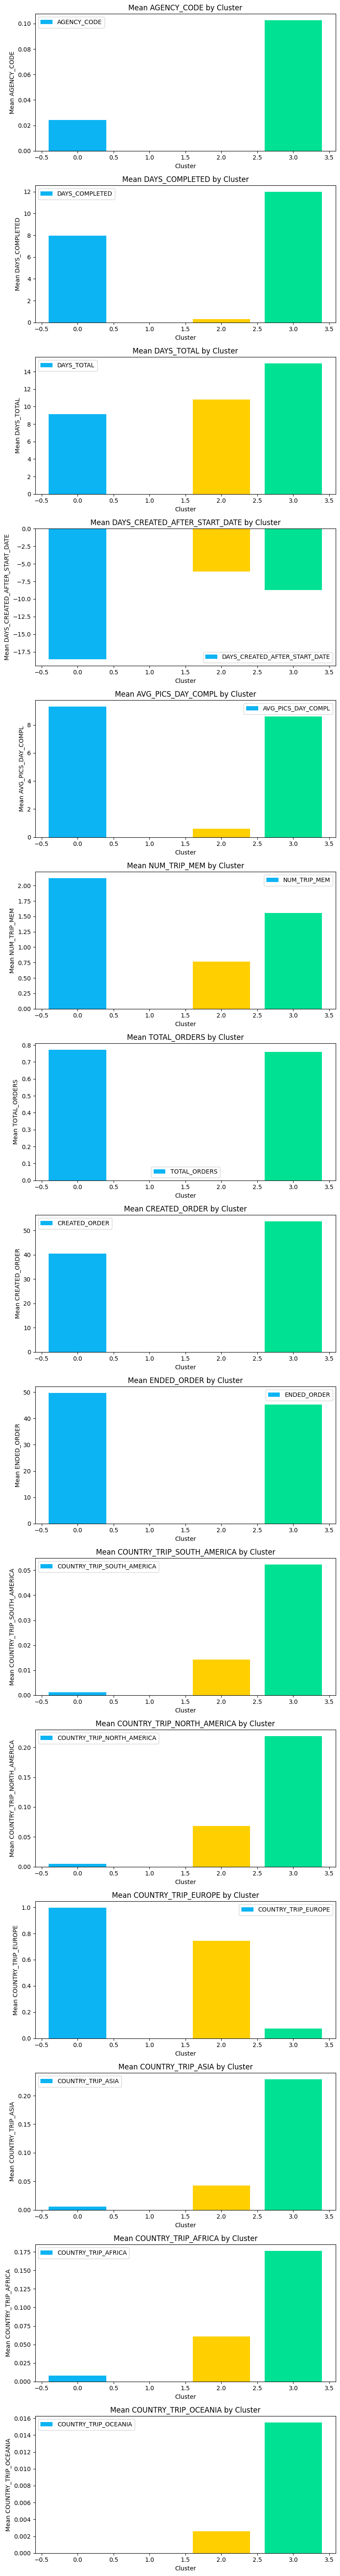

In [155]:
means_df = new_data.groupby('CLUSTER').mean()

selected_clusters = [0, 2, 3]
filter_cluster = means_df.loc[selected_clusters]

clusters = filter_cluster.index
columns = filter_cluster.columns

cluster_colors = ['#0DB4F3', '#FFCF00', '#00E194']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))

for i, column in enumerate(columns):
    axes[i].bar(clusters, filter_cluster[column], color=cluster_colors, label=column)
    axes[i].set_ylabel('Mean ' + column)
    axes[i].set_xlabel('Cluster')
    axes[i].set_title('Mean ' + column + ' by Cluster')
    axes[i].legend()

plt.tight_layout()
plt.show()

TOTAL_ORDERS
1    666
0    198
Name: count, dtype: int64


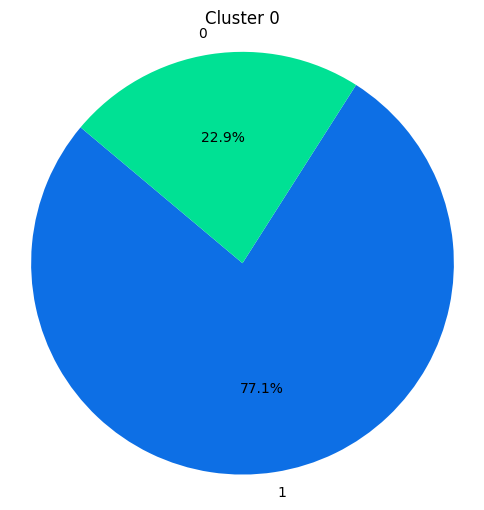

In [157]:
total_orders_counts = data_cluster0["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

total_orders_data = data_cluster0['TOTAL_ORDERS']

colors = ['#0D6FE5', '#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title("Cluster 0")
plt.axis('equal')
plt.show()

TOTAL_ORDERS
0    775
Name: count, dtype: int64


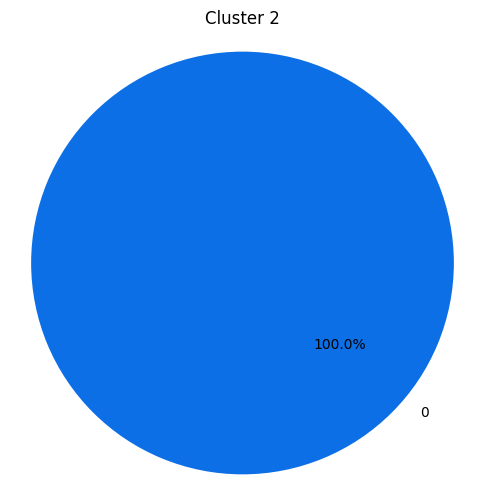

In [150]:
total_orders_counts = data_cluster2["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#0D6FE5','#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 2')
plt.axis('equal')
plt.show()

TOTAL_ORDERS
1    392
0    125
Name: count, dtype: int64


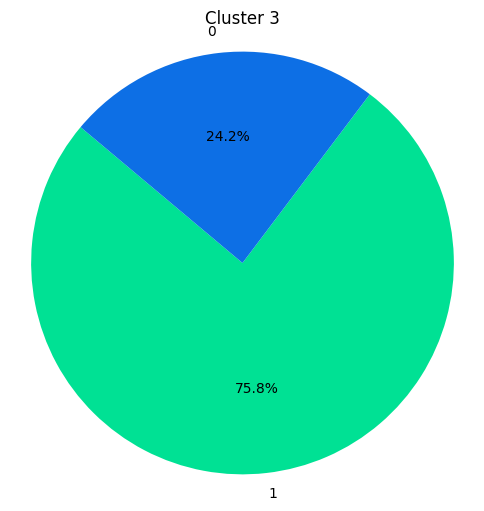

In [151]:
total_orders_counts = data_cluster3["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 3')
plt.axis('equal')
plt.show()

Aquesta clusterització ja te una mica més de suc, hem inclós totes les variables inicials i alhora la variable de si el viatge conté algun país d'Europa o no.

Ara ens crea 4 clusters, tot i que un d'aquest es minúscul i més val no considerar-lo ja que esta distribuit casi random.

Quan afegeixo les altres variables, vec diferencies interesants entre els clusters. 
- Un es de 0 conversions, alla ens agrupa viatges de una durada mitja, creats molt propers al viatge, sense fotos completades i amb una dsitrubció geografica repartida.
- Els altres dos si tenen conversions. El primer son viatges curts, amb més membres i creats molt després del viaatge, principalment viatges per europa.
- Els altres son viatges més llargs, amb menys membres i fora d'europa, es creen mes properament al viatge i molts d'ells venen amb agencies.


# Kmeans - Només amb variables originals

In [158]:
variables = ["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM"]
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_cluster[variables]), columns = variables)
data_scaled.index = data_cluster.index
data_scaled["TOTAL_ORDERS"] = data_cluster["TOTAL_ORDERS"]

data_scaled.head()

DAYS_COMPLETED  DAYS_TOTAL  DAYS_CREATED_AFTER_START_DATE  \
11       -0.919439    0.129463                       0.448333   
20       -0.919439   -0.021451                       0.229884   
26       -0.919439    0.280377                       0.461986   
33       -0.919439   -0.625106                       0.158205   
45       -0.919439   -0.474193                       1.148054   

    AVG_PICS_DAY_COMPL  NUM_TRIP_MEM  TOTAL_ORDERS  
11           -1.155765     -0.297926             0  
20           -1.155765      0.922125             0  
26           -1.155765     -0.907952             0  
33           -1.155765     -0.297926             0  
45           -1.155765      0.312100             0

In [159]:
data_clustering = data_scaled[["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM"]]

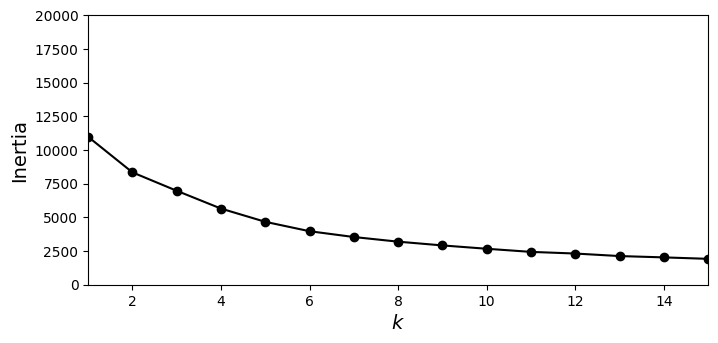

In [160]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=33, n_init=20).fit(data_clustering) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 15, 0, 20000])
plt.show()

In [162]:
kmeans_model = KMeans(n_clusters=4, random_state=33, n_init=20)
kmeans_model.fit(data_clustering)

labels = kmeans_model.labels_

df_kmeans = pd.DataFrame(data_clustering, columns=["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM"])

df_kmeans["CLUSTER"] = labels

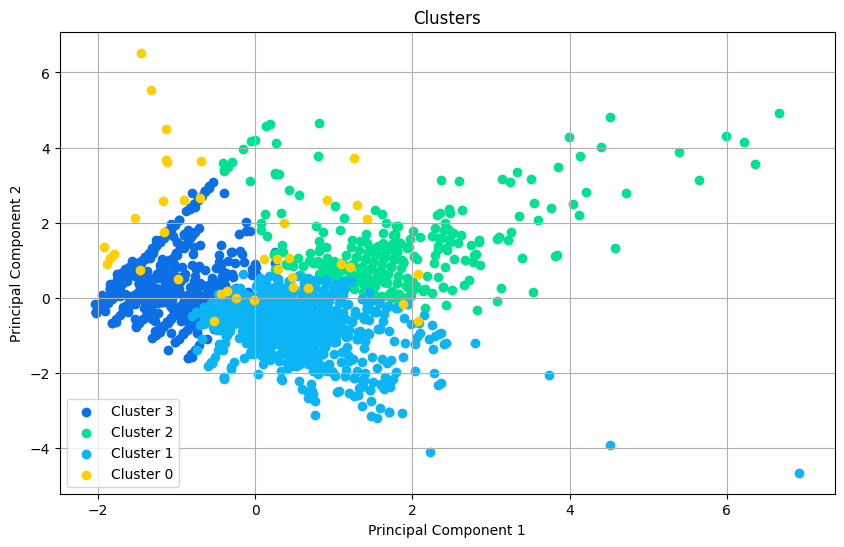

In [163]:
pca = PCA(n_components=2)
data_clustering = df_kmeans[["DAYS_COMPLETED","DAYS_TOTAL", "DAYS_CREATED_AFTER_START_DATE", "AVG_PICS_DAY_COMPL", "NUM_TRIP_MEM"]]
X_pca = pca.fit_transform(data_clustering)

labels = kmeans_model.labels_

df_pca = pd.DataFrame(X_pca, columns=['Componente_1', 'Componente_2'])
df_pca['Cluster'] = labels

colors = ['#0D6FE5', '#00E194', '#0DB4F3', '#FFCF00']

plt.figure(figsize=(10, 6))
for cluster, color in zip(df_pca['Cluster'].unique(), colors):
        plt.scatter(df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_1'],
                    df_pca.loc[df_pca['Cluster'] == cluster, 'Componente_2'],
                    label=f'Cluster {cluster}', color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [164]:
df_kmeans["CLUSTER"].value_counts()

CLUSTER
1    1019
3     808
2     329
0      39
Name: count, dtype: int64

In [125]:
new_data = pd.merge(data_cluster, df_kmeans[['CLUSTER']], left_index=True, right_index=True)

In [126]:
datasets_por_cluster = {}

clusters = new_data["CLUSTER"].unique()

for cluster in clusters:
    cluster_data = new_data[new_data['CLUSTER'] == cluster]

    datasets_por_cluster[cluster] = cluster_data

data_cluster1 = datasets_por_cluster[1]
data_cluster2 = datasets_por_cluster[2]
data_cluster3 = datasets_por_cluster[3]

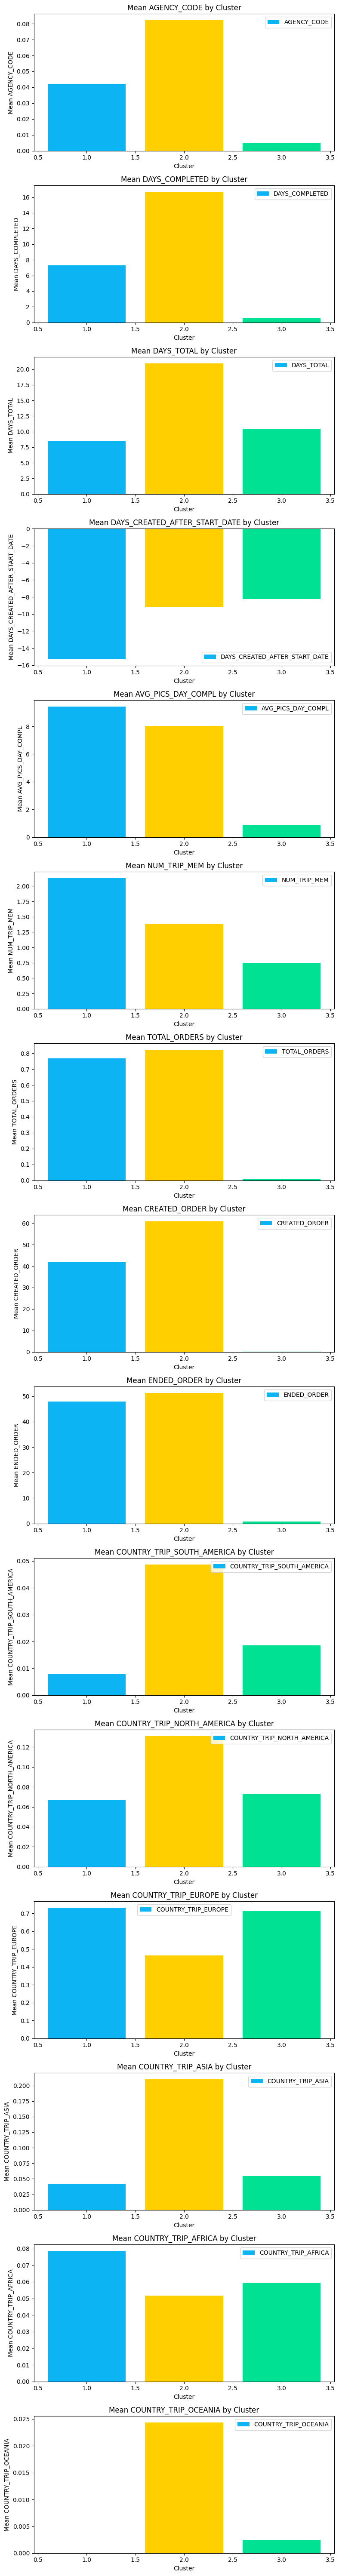

In [127]:
means_df = new_data.groupby('CLUSTER').mean()

selected_clusters = [1, 2, 3]
filter_cluster = means_df.loc[selected_clusters]

clusters = filter_cluster.index
columns = filter_cluster.columns

cluster_colors = ['#0DB4F3', '#FFCF00', '#00E194']

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))

for i, column in enumerate(columns):
    axes[i].bar(clusters, filter_cluster[column], color=cluster_colors, label=column)
    axes[i].set_ylabel('Mean ' + column)
    axes[i].set_xlabel('Cluster')
    axes[i].set_title('Mean ' + column + ' by Cluster')
    axes[i].legend()

plt.tight_layout()
plt.show()

TOTAL_ORDERS
1    782
0    237
Name: count, dtype: int64


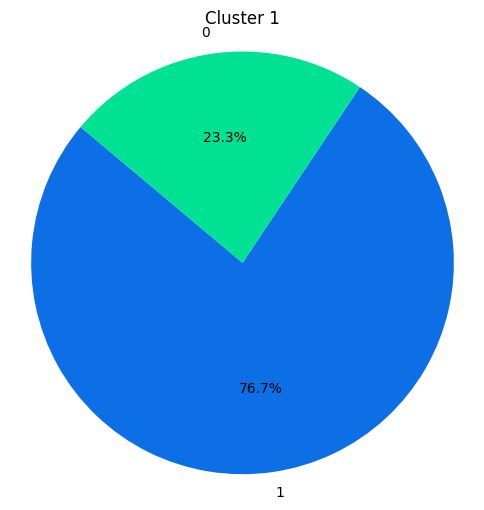

In [128]:
total_orders_counts = data_cluster1["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

total_orders_data = data_cluster1['TOTAL_ORDERS']

colors = ['#0D6FE5', '#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title("Cluster 1")
plt.axis('equal')
plt.show()



TOTAL_ORDERS
1    270
0     59
Name: count, dtype: int64


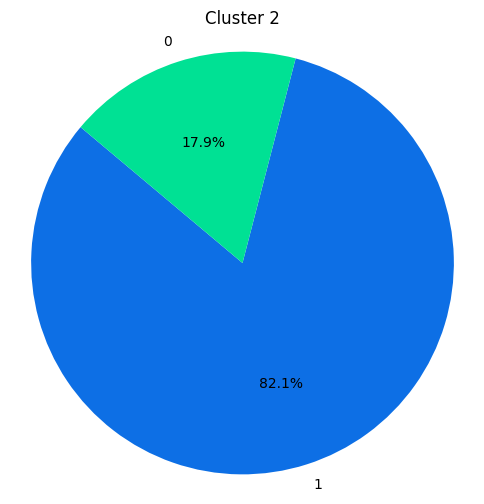

In [130]:
total_orders_counts = data_cluster2["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#0D6FE5','#00E194']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 2')
plt.axis('equal')
plt.show()

TOTAL_ORDERS
0    802
1      6
Name: count, dtype: int64


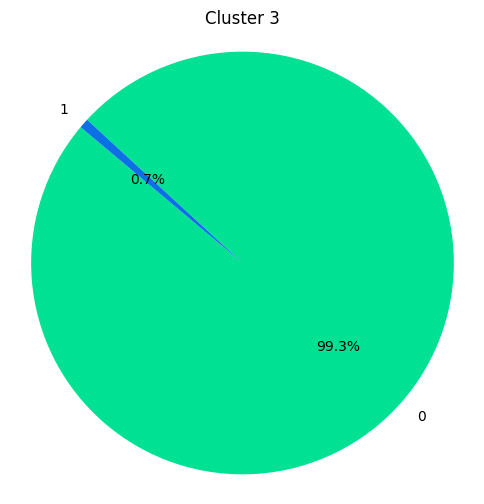

In [132]:
total_orders_counts = data_cluster3["TOTAL_ORDERS"].value_counts()
print(total_orders_counts)

colors = ['#00E194','#0D6FE5']

plt.figure(figsize=(6, 6))
plt.pie(total_orders_counts, labels=total_orders_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Cluster 3')
plt.axis('equal')
plt.show()

Kmeans - Només variables originals

En aquest cas només hem inclos variables originals. Al fer-ho tornem a tenir el mateix resultat, 4 clusters, dels quals un no serveix perquè es petit i te una distribució "random".

- Tenim un primer de viates molt curts, creat bastant després del vaitge i amb moltes fotos per dia i molts membres, que converteix, principalment a europa i africa com a paisos visitats, la part de africa sorpren una mica pero podria ser que siguin viatges a marroc, que poden ser curtets. 
-  El segon també converteix i es una mica a tots els paisos pero sobretot el que pasa es que son vaitges mes llargs, potser amb menys membres i menys fotos.
- I el tercer no converteix gens, es un cluster similar al primer que he mencionat pero amb menys membres.

S'hauria d'analitzar, pero sintueix que el segon es el millor perque converteixen similar i al ser mes llarg, alhora es mes car. (Però s'ha de tenir en compte que es el cluster amb menys usuaris)